### Geometric Optimization of Dose Distribution in Spatially Fractionated Radiation Therapy

Copyright (c) 2024 Seyedmohammadhossein Hosseinian. All rights reserved.

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import math
import pickle
import threading

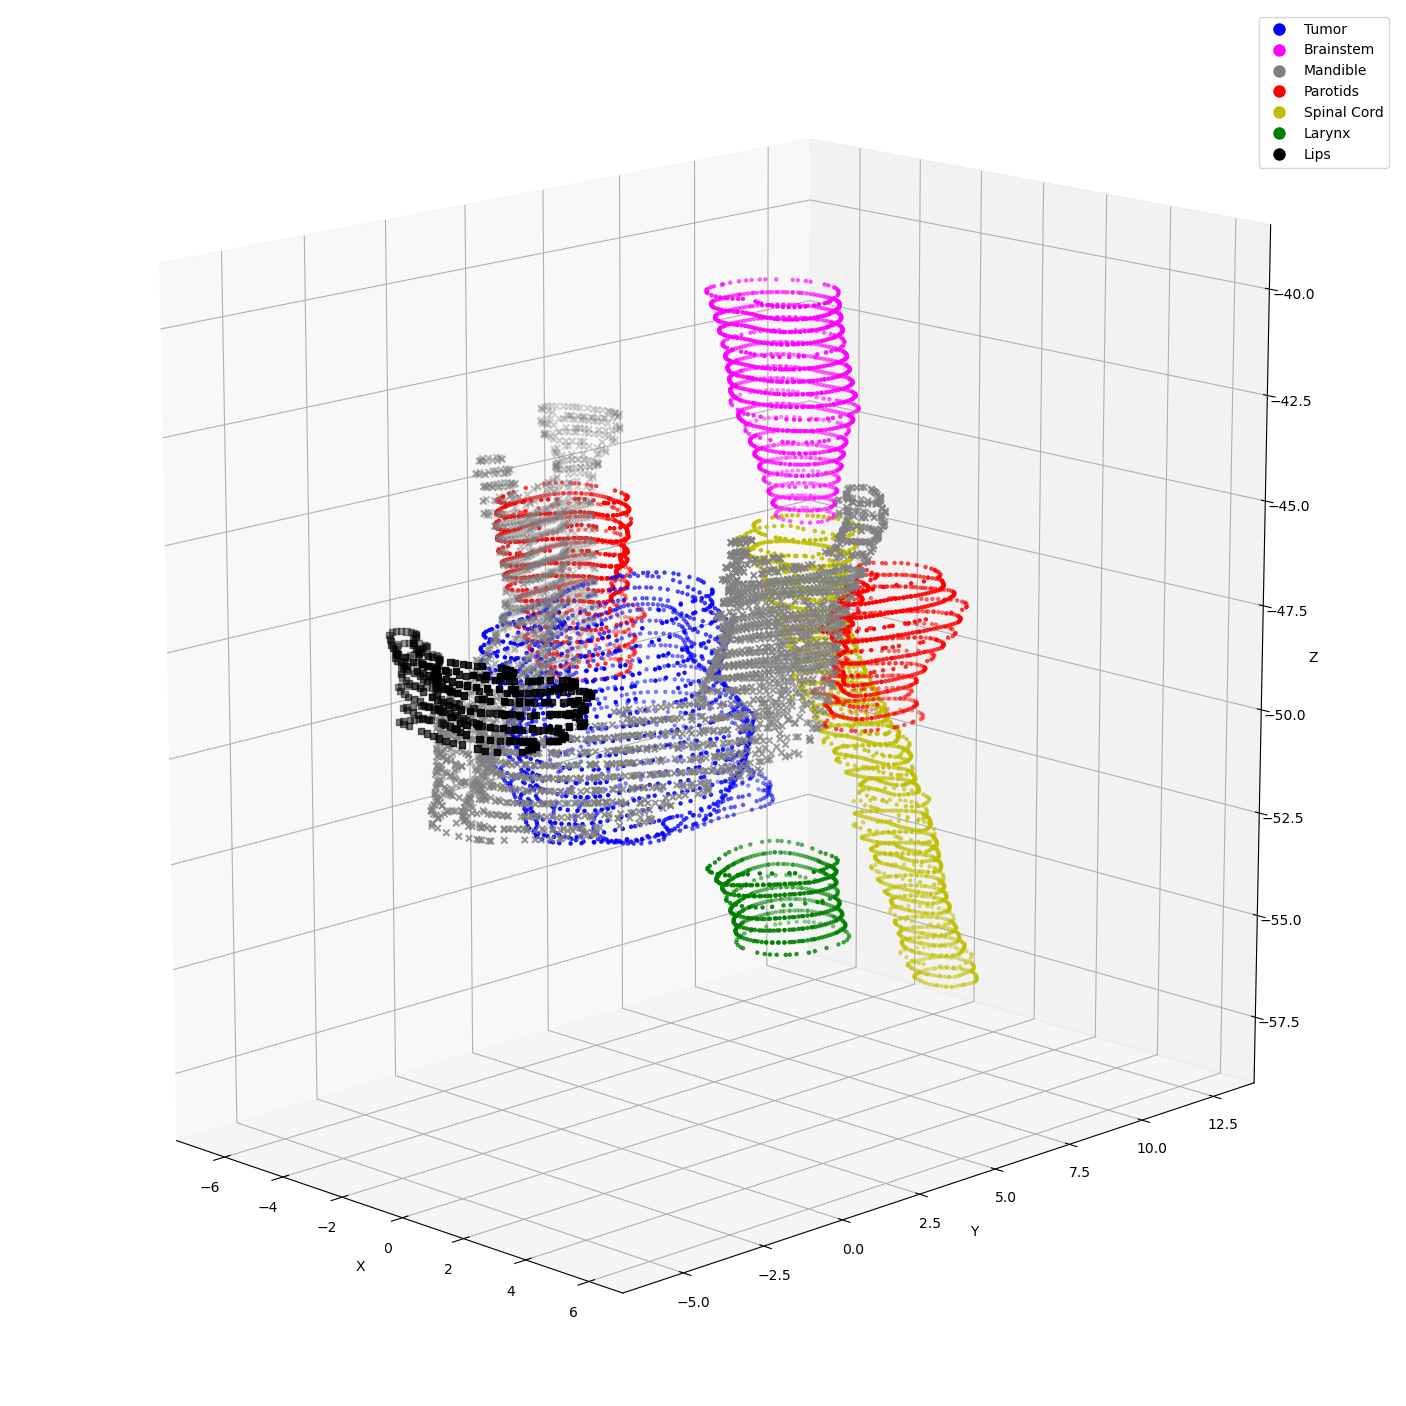

In [2]:
#Read tumor and OARs
tumor = pd.read_csv('CH_GTV_GRID.csv')
x, y, z = tumor['X'], tumor['Y'], tumor['Z']
#
brainstem = pd.read_csv('CH_Brainstem.csv')
xB, yB, zB = brainstem['X'], brainstem['Y'], brainstem['Z']
#
larynx = pd.read_csv('CH_Larynx.csv')
xLx, yLx, zLx = larynx['X'], larynx['Y'], larynx['Z']
#
lips = pd.read_csv('CH_Lips.csv')
xLp, yLp, zLp = lips['X'], lips['Y'], lips['Z']
#
mandible = pd.read_csv('CH_Mandible.csv')
xM, yM, zM = mandible['X'], mandible['Y'], mandible['Z']
#
parotid_left = pd.read_csv('CH_Parotid_L.csv')
xPl, yPl, zPl = parotid_left['X'], parotid_left['Y'], parotid_left['Z']
#
parotid_right = pd.read_csv('CH_Parotid_R.csv')
xPr, yPr, zPr = parotid_right['X'], parotid_right['Y'], parotid_right['Z']
#
spinalCord = pd.read_csv('CH_SpinalCord.csv')
xS, yS, zS = spinalCord['X'], spinalCord['Y'], spinalCord['Z']
#
fig = plt.figure(figsize=(18,18))
oar = fig.add_subplot(111, projection='3d')
oar.scatter(xM, yM, zM, color='gray', marker='x')
oar.scatter(x, y, z, color='b', marker='.')
oar.scatter(xB, yB, zB, color='magenta', marker='.')
oar.scatter(xLx, yLx, zLx, color='green', marker='.')
oar.scatter(xLp, yLp, zLp, color='black', marker=',')
oar.scatter(xPl, yPl, zPl, color='r', marker='.')
oar.scatter(xPr, yPr, zPr, color='r', marker='.')
oar.scatter(xS, yS, zS, color='y', marker='.')
oar.set_xlabel('X')
oar.set_ylabel('Y')
oar.set_zlabel('Z')
oar.view_init(elev=15, azim=-45, roll=0)
oar.set_aspect('equal')
#
Lgtumor = plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor='blue')
Lgbrainstem = plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor='magenta')
Lgmandible = plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor='gray')
Lgparotids = plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor='red')
LgspinalCord = plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor='y')
Lglarynx = plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor='green')
Lglips = plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor='black')
plt.legend(handles=[Lgtumor, Lgbrainstem, Lgmandible, Lgparotids, LgspinalCord, Lglarynx, Lglips], labels=['Tumor', 'Brainstem', 'Mandible', 'Parotids', 'Spinal Cord', 'Larynx', 'Lips'])
#
plt.show()

x_min = -5.104832
x_max = 1.425435
y_min = -3.131663
y_max = 6.956197
z_min = -52.409
z_max = -46.409
-----------------------
Tumor X-length = 6.530267
Tumor Y-length = 10.087860000000001
Tumor Z-length = 6.0


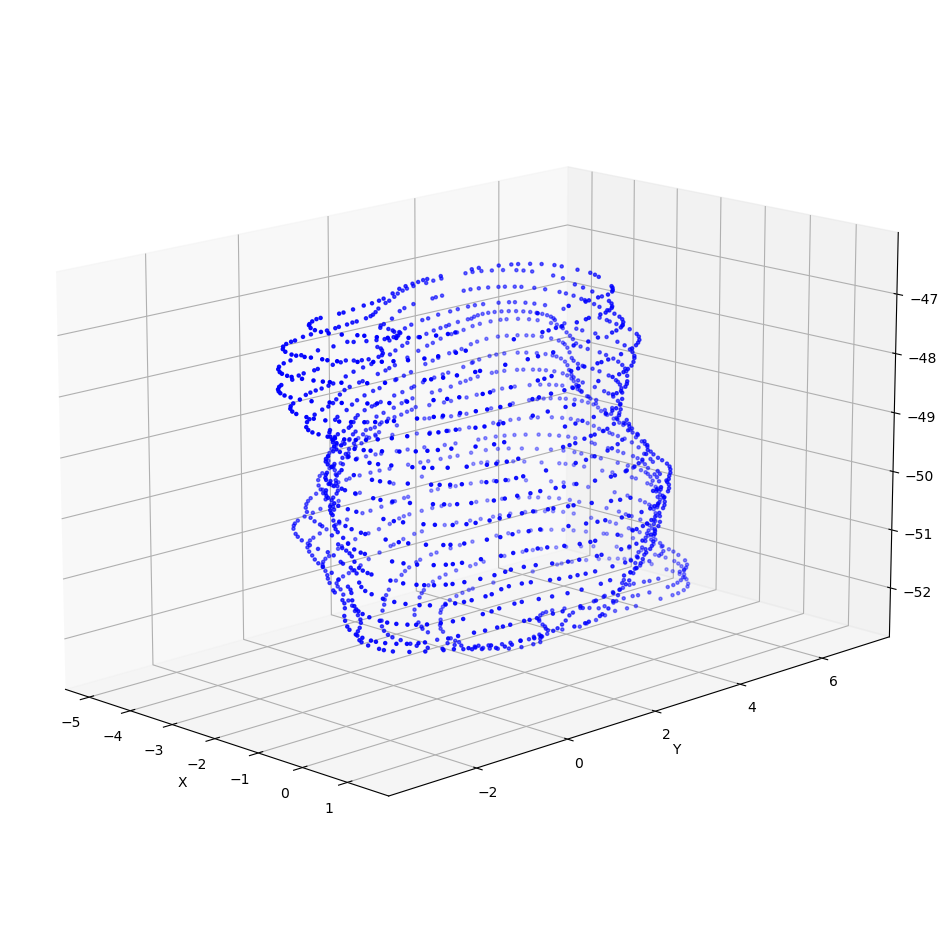

In [3]:
#Tumor's dimensions
x_min = tumor['X'].min()
x_max = tumor['X'].max()
y_min = tumor['Y'].min()
y_max = tumor['Y'].max()
z_min = tumor['Z'].min()
z_max = tumor['Z'].max()
print('x_min = '+str(x_min))
print('x_max = '+str(x_max))
print('y_min = '+str(y_min))
print('y_max = '+str(y_max))
print('z_min = '+str(z_min))
print('z_max = '+str(z_max))
print("-----------------------")
print('Tumor X-length = '+str(x_max - x_min))
print('Tumor Y-length = '+str(y_max - y_min))
print('Tumor Z-length = '+str(z_max - z_min))
#
fig = plt.figure(figsize=(12,12))
Tm = fig.add_subplot(111, projection='3d')
Tm.scatter(x, y, z, color='b', marker='.')
Tm.set_xlabel('X')
Tm.set_ylabel('Y')
Tm.set_zlabel('Z')
Tm.view_init(elev=15, azim=-45, roll=0)
Tm.set_aspect('equal')
plt.show()

In [4]:
unique_z_values = tumor['Z'].unique()
unique_z_values.sort()
ALL = []
for z in unique_z_values:
    fixed_z = tumor[tumor['Z'] == z]
    temp = fixed_z.values.tolist()
    ALL.append(temp)
#
unique_z_values_B = brainstem['Z'].unique()
unique_z_values_B.sort()
ALL_B = []
for z in unique_z_values_B:
    fixed_z_B = brainstem[brainstem['Z'] == z]
    temp_B = fixed_z_B.values.tolist()
    ALL_B.append(temp_B)
#
unique_z_values_Lx = larynx['Z'].unique()
unique_z_values_Lx.sort()
ALL_Lx = []
for z in unique_z_values_Lx:
    fixed_z_Lx = larynx[larynx['Z'] == z]
    temp_Lx = fixed_z_Lx.values.tolist()
    ALL_Lx.append(temp_Lx)
#
unique_z_values_Lp = lips['Z'].unique()
unique_z_values_Lp.sort()
ALL_Lp = []
for z in unique_z_values_Lp:
    fixed_z_Lp = lips[lips['Z'] == z]
    temp_Lp = fixed_z_Lp.values.tolist()
    ALL_Lp.append(temp_Lp)
#
unique_z_values_M = mandible['Z'].unique()
unique_z_values_M.sort()
ALL_M = []
for z in unique_z_values_M:
    fixed_z_M = mandible[mandible['Z'] == z]
    temp_M = fixed_z_M.values.tolist()
    ALL_M.append(temp_M)
#
unique_z_values_Pl = parotid_left['Z'].unique()
unique_z_values_Pl.sort()
ALL_Pl = []
for z in unique_z_values_Pl:
    fixed_z_Pl = parotid_left[parotid_left['Z'] == z]
    temp_Pl = fixed_z_Pl.values.tolist()
    ALL_Pl.append(temp_Pl)
#
unique_z_values_Pr = parotid_right['Z'].unique()
unique_z_values_Pr.sort()
ALL_Pr = []
for z in unique_z_values_Pr:
    fixed_z_Pr = parotid_right[parotid_right['Z'] == z]
    temp_Pr = fixed_z_Pr.values.tolist()
    ALL_Pr.append(temp_Pr)
#
unique_z_values_S = spinalCord['Z'].unique()
unique_z_values_S.sort()
ALL_S = []
for z in unique_z_values_S:
    fixed_z_S = spinalCord[spinalCord['Z'] == z]
    temp_S = fixed_z_S.values.tolist()
    ALL_S.append(temp_S)

In [5]:
#Discretization parameters
spacing = 0.3
margin = 0.5
radii = [0.25,0.5,1.0]
max_dose_B = 20
max_dose_Lx = 20
max_dose_Lp = 20
max_dose_M = 20
max_dose_Pl = 20
max_dose_Pr = 20
max_dose_S = 20
#
x_coords = np.arange(x_min, x_max, spacing)
y_coords = np.arange(y_min, y_max, spacing)
z_coords = np.arange(z_min, z_max + spacing, spacing)
x_grid = []
y_grid = []
for i in x_coords:
    for j in y_coords:
        x_grid.append(i)
        y_grid.append(j)

In [6]:
#Utility functions
def find_closest_level(y, y_series):
    closest_point = y_series[0]
    min_distance = abs(y - closest_point)
    for point in y_series[1:]:
        distance = abs(y - point)
        if distance < min_distance:
            min_distance = distance
            closest_point = point
    return closest_point
#
def make_levels(z_ind, unique_z_values, margin, radii):
    l =[]
    for r in radii:
        d = margin + r
        temp = [z_ind]
        for t in range(len(unique_z_values)):
            t += 1
            if (z_ind - t >= 0) and (unique_z_values[z_ind] - unique_z_values[z_ind - t] <= d):
                temp.append(z_ind - t)
            if (z_ind + t <= len(unique_z_values)-1) and (unique_z_values[z_ind + t] - unique_z_values[z_ind] <= d):
                temp.append(z_ind + t)
        l.append(temp)
    l_rev = [l[0]]
    for i in range(1, len(l)):
        temp = []
        for j in l[i]:
            if j not in l[i-1]:
                temp.append(j)
        l_rev.append(temp)
    return l_rev
#
def too_close(p, levels, ALL, margin, radii):
    result = [0 for ele in radii]
    total = 0
    for l in range(len(levels)):
        for lev in levels[l]:
            for point in ALL[lev]:
                distance = math.sqrt((p[0] - point[0]) ** 2 + (p[1] - point[1]) ** 2 + (p[2] - point[2]) ** 2)
                for r in range(len(radii)):
                    if (result[r] == 0) and (distance <= margin + radii[r]):
                        result[r] = 1
                        total += 1
                if total == len(result):
                    return result
    return result

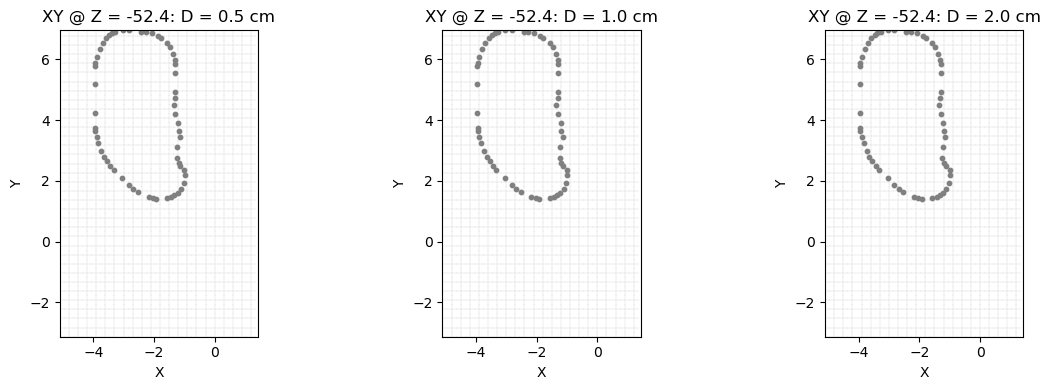

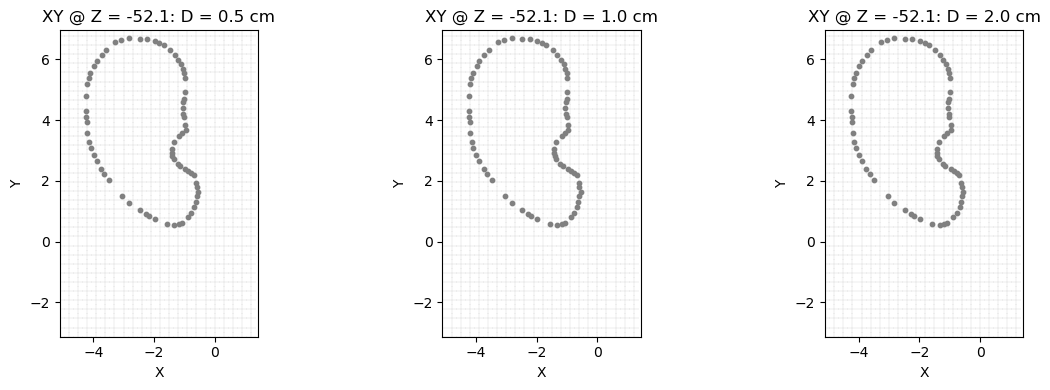

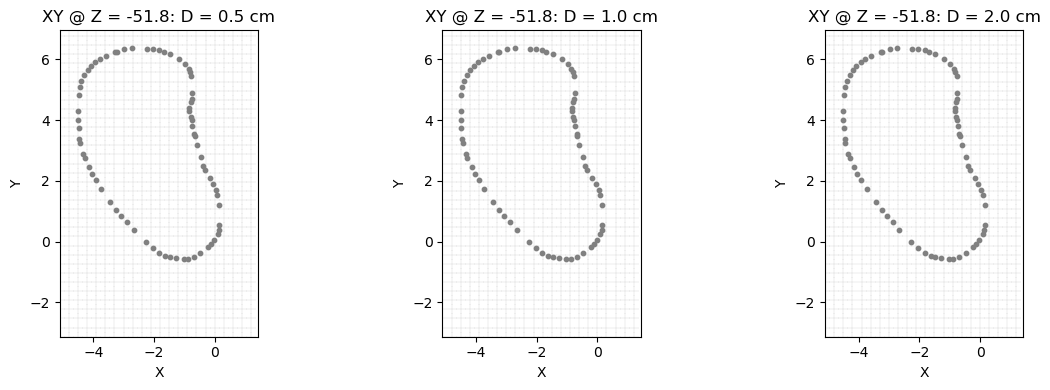

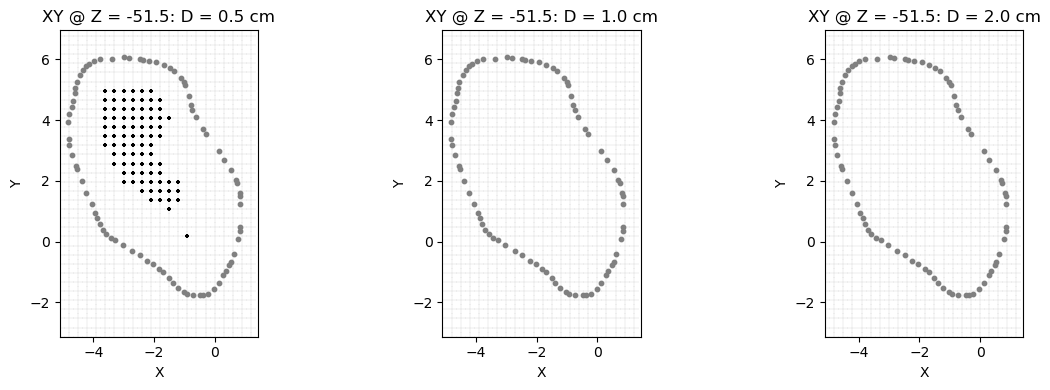

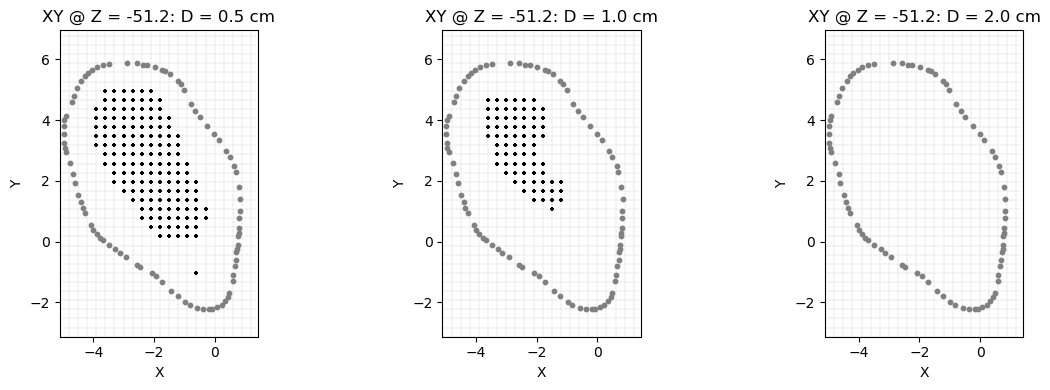

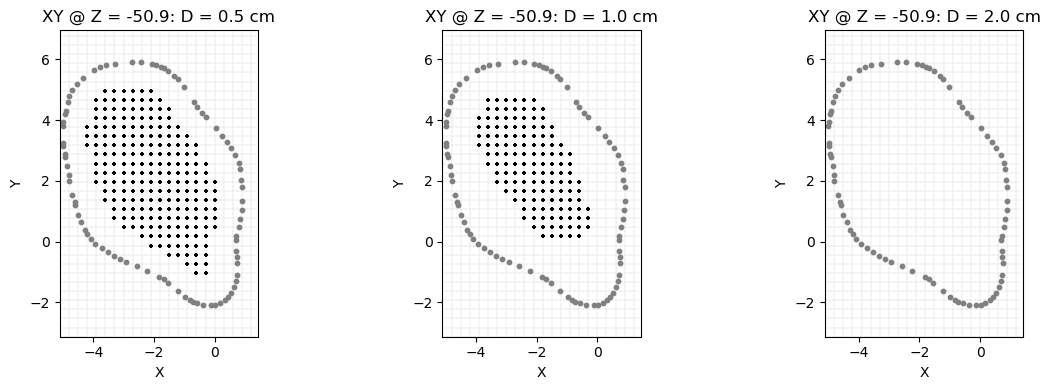

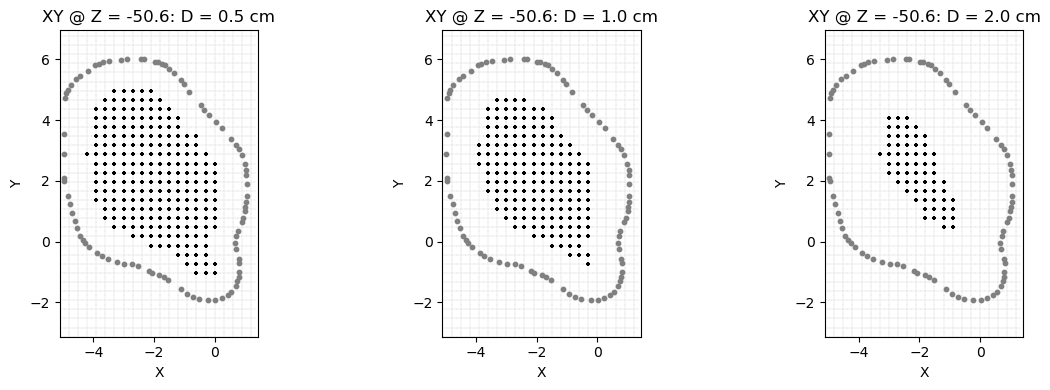

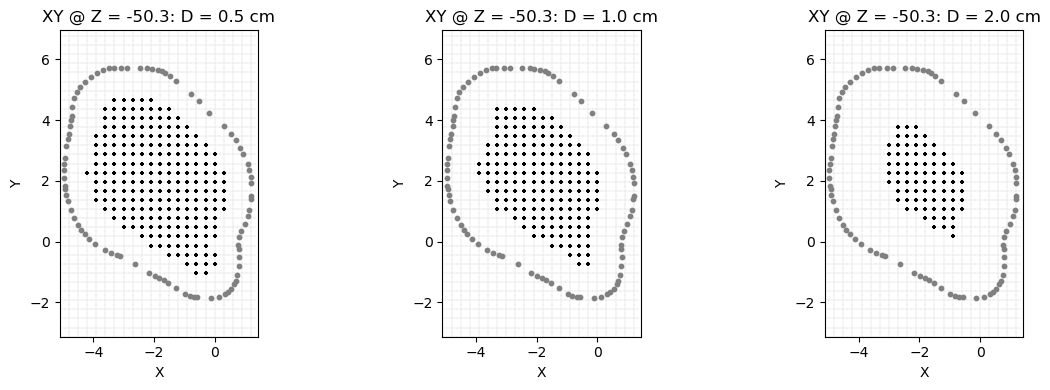

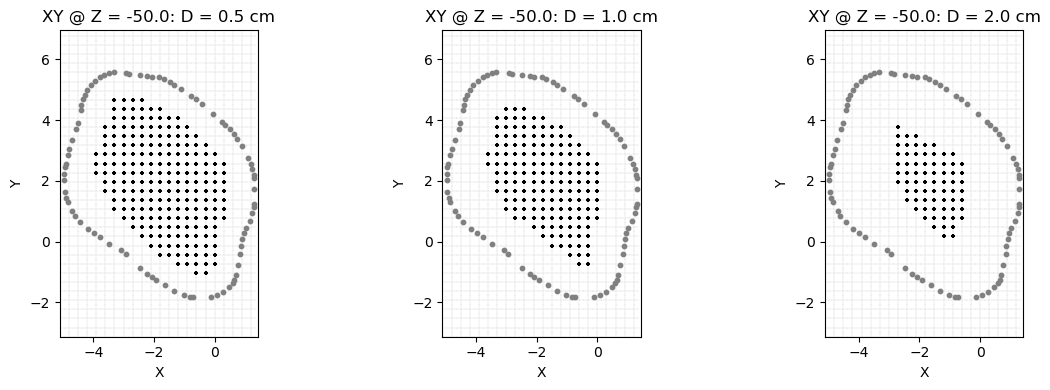

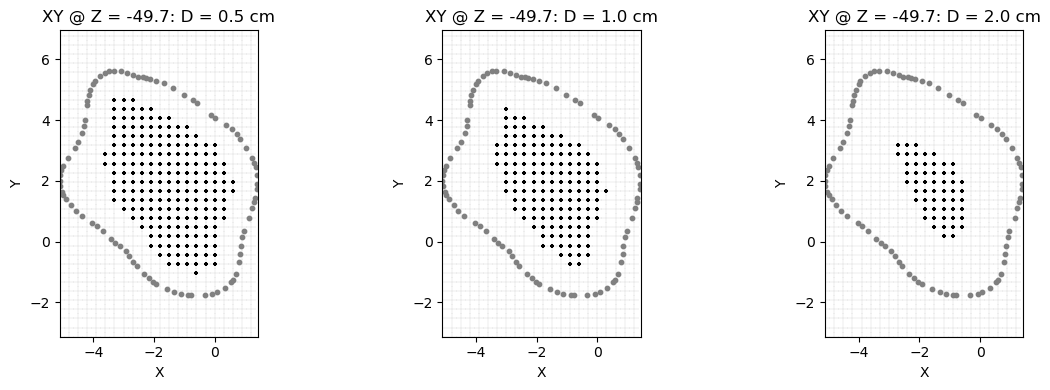

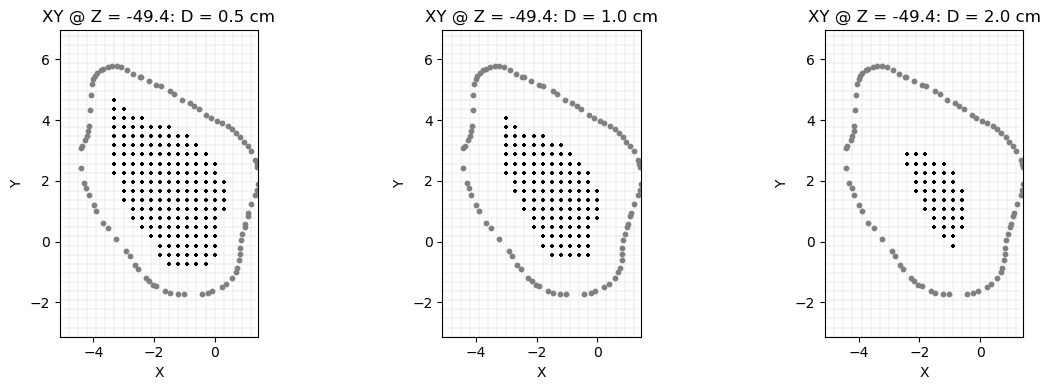

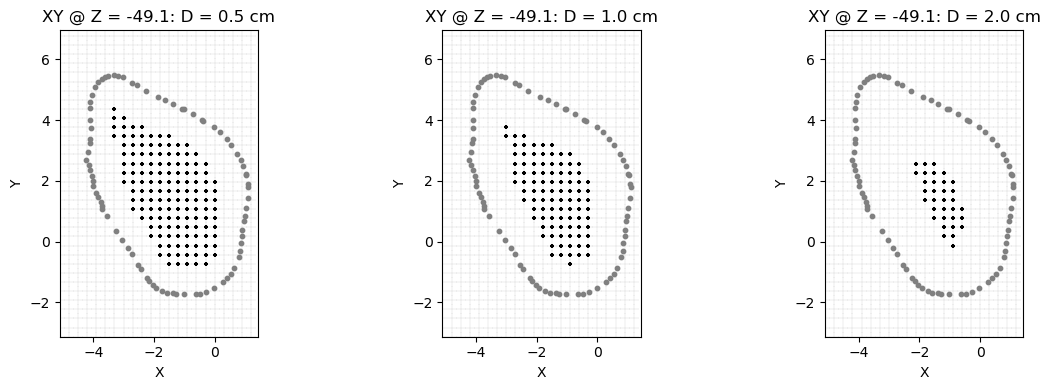

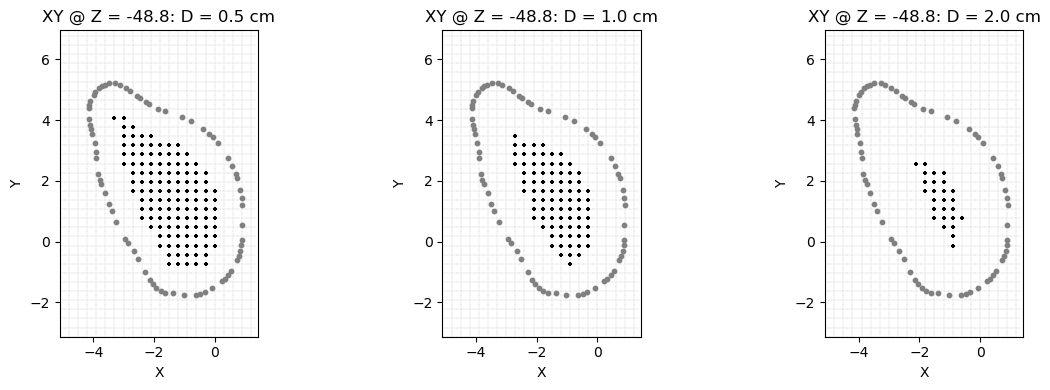

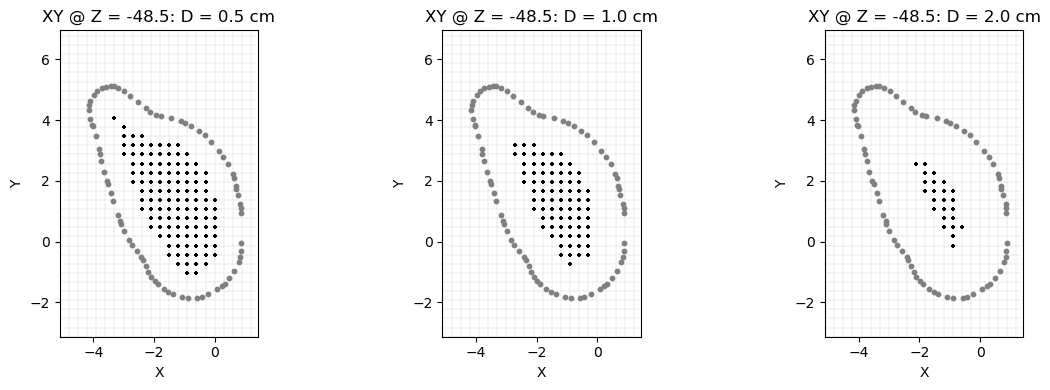

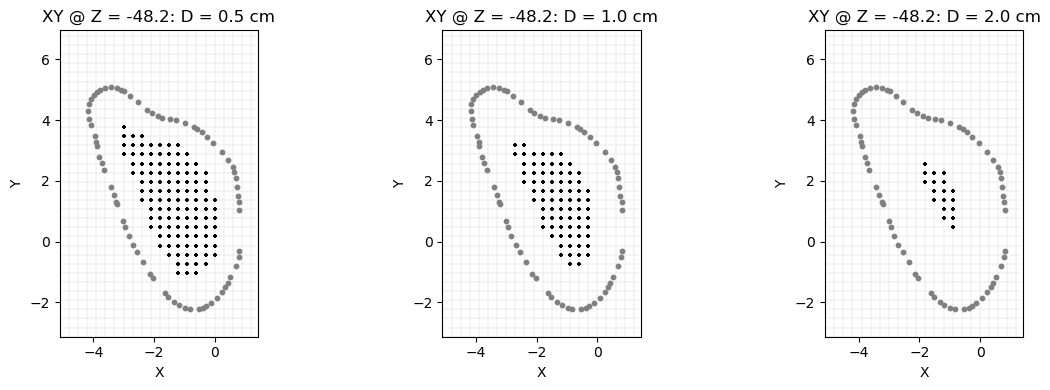

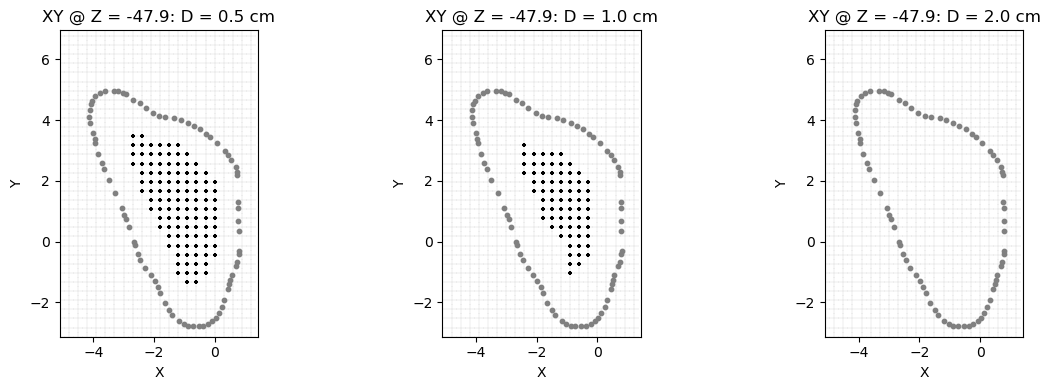

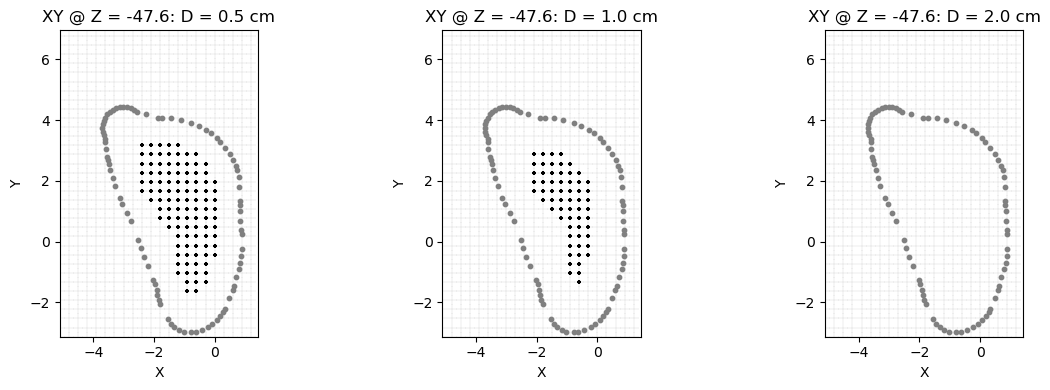

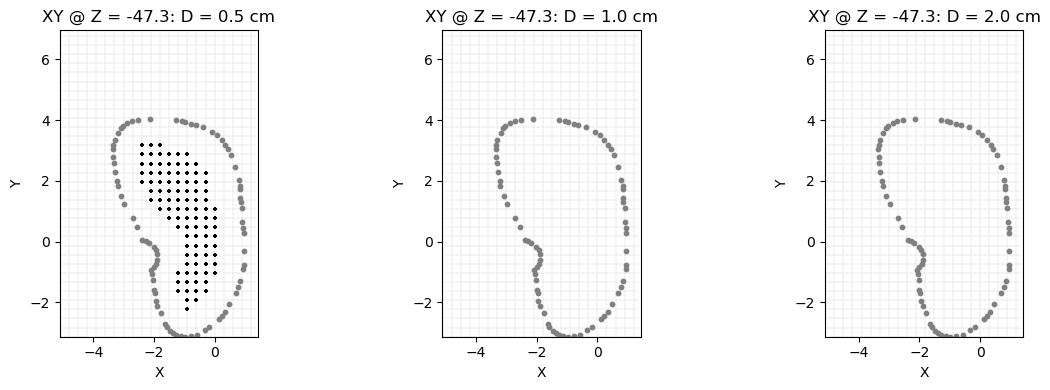

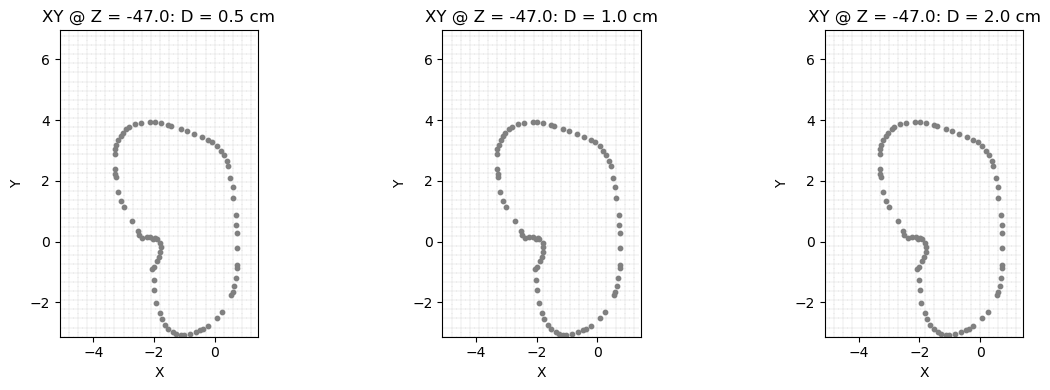

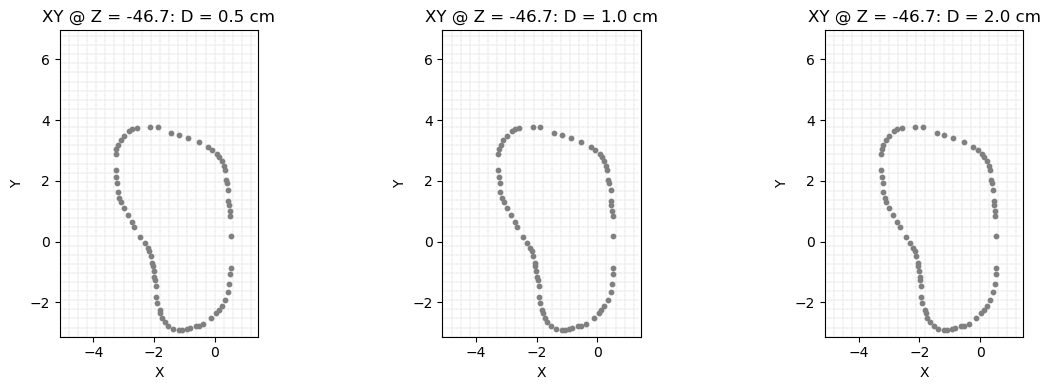

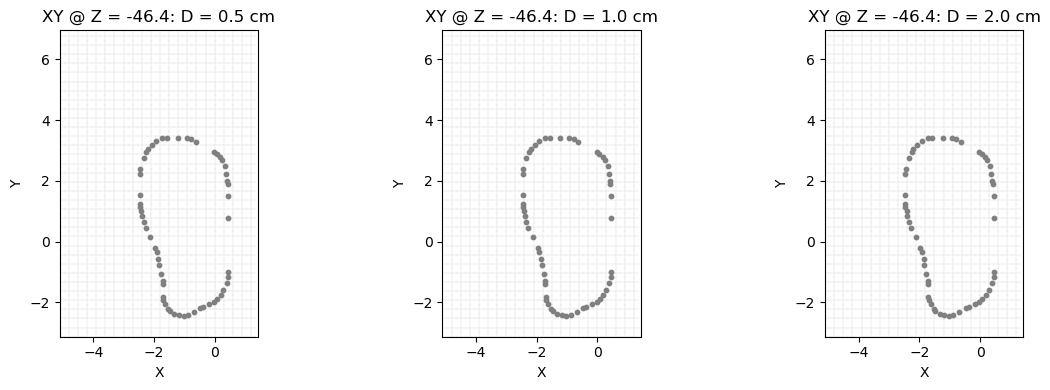

Initial Vertex Number = 3988


In [7]:
#Candidate points
init_gid_num = 0
init_ver_num = 0
temp = []
for z_ind in range(len(unique_z_values)):
    z = unique_z_values[z_ind]
    x_inside=[[] for ele in radii] #for diameters of 0.5, 1, and 2 cm (equivalently radii of 0.25, 0.5, 1) repectively
    y_inside=[[] for ele in radii]
    z_inside=[[] for ele in radii]
    levels = make_levels(z_ind, unique_z_values, margin, radii)
    x_tumor_z = []
    y_tumor_z = []
    for e in ALL[z_ind]:
        x_tumor_z.append(e[0])
        y_tumor_z.append(e[1])
    x_min_z = min(x_tumor_z)
    x_max_z = max(x_tumor_z)
    y_min_z = min(y_tumor_z)
    y_max_z = max(y_tumor_z)
    for j in y_coords:
        if j < y_min_z or j > y_max_z:
            continue
        else:
            y_level = find_closest_level(j, y_tumor_z)
            x_range=[]
            for point in ALL[z_ind]:
                if point[1]>=y_level-2*spacing and point[1]<=y_level+2*spacing:
                    x_range.append(point[0])
            x_min_level = min(x_range)
            x_max_level = max(x_range)
            for i in x_coords:
                if i>=x_min_level and i<=x_max_level:
                    p = [i,j,z]
                    TC = too_close(p, levels, ALL, margin, radii)
                    for t in range(len(TC)):
                        if z > z_min + margin + radii[t] and z < z_max - margin - radii[t]:
                            if TC[t] == 0:
                                init_ver_num += 1
                                x_inside[t].append(p[0])
                                y_inside[t].append(p[1])
                                z_inside[t].append(p[2])
    #
    temp.append([x_inside,y_inside,z_inside])
    #
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
    ax1.scatter(x_tumor_z, y_tumor_z, c='gray', marker='o',s=10)
    ax1.scatter(x_grid, y_grid, c='gray', marker='+', lw=0.1, s=50)
    ax1.scatter(x_inside[0], y_inside[0], c='black', marker='+', s=20*spacing)
    ax1.set_xlim(x_min, x_max)
    ax1.set_ylim(y_min, y_max)
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_title(f'XY @ Z = {np.round(z,1)}: D = {2*radii[0]} cm')
    ax1.set_aspect('equal')
    #
    ax2.scatter(x_tumor_z, y_tumor_z, c='gray', marker='o',s=10)
    ax2.scatter(x_grid, y_grid, c='gray', marker='+', lw=0.1, s=50)
    ax2.scatter(x_inside[1], y_inside[1], c='black', marker='+', s=20*spacing)
    ax2.set_xlim(x_min, x_max)
    ax2.set_ylim(y_min, y_max)
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title(f'XY @ Z = {np.round(z,1)}: D = {2*radii[1]} cm')
    ax2.set_aspect('equal')
    #
    ax3.scatter(x_tumor_z, y_tumor_z, c='gray', marker='o',s=10)
    ax3.scatter(x_grid, y_grid, c='gray', marker='+', lw=0.1, s=50)
    ax3.scatter(x_inside[2], y_inside[2], c='black', marker='+', s=20*spacing)
    ax3.set_xlim(x_min, x_max)
    ax3.set_ylim(y_min, y_max)
    ax3.set_xlabel('X')
    ax3.set_ylabel('Y')
    ax3.set_title(f'XY @ Z = {np.round(z,1)}: D = {2*radii[2]} cm')
    ax3.set_aspect('equal')
    #
    plt.tight_layout()
    plt.show()
#
print('Initial Vertex Number = '+str(init_ver_num))

In [8]:
#Utility functions
def is_inside_ellipsoid(point, center, a, b, c):
    x, y, z = point
    dx, dy, dz = center
    return ((x - dx)**2 / a**2 + (y - dy)**2 / b**2 + (z - dz)**2 / c**2) <= 1
#
def find_intersection(ellipsoid, center, point_e):
    a, b, c = ellipsoid
    d_x, d_y, d_z = center
    e_x, e_y, e_z = point_e
    dir_x = e_x - d_x
    dir_y = e_y - d_y
    dir_z = e_z - d_z
    A = (dir_x / a) ** 2 + (dir_y / b) ** 2 + (dir_z / c) ** 2
    B = 0
    C = -1
    # Solving the quadratic equation At^2 + Bt + C = 0
    t_values = np.roots([A, B, C])
    # Filter out real solutions and compute the intersection points
    intersection_points = [(d_x + t * dir_x, d_y + t * dir_y, d_z + t * dir_z) for t in t_values if np.isreal(t)]
    temp = 1000
    final_point = intersection_points[0]
    for p in intersection_points:
        dist = math.sqrt((p[0] - e_x) ** 2 + (p[1] - e_y) ** 2 + (p[2] - e_z) ** 2)
        if dist < temp:
            temp = dist
            final_point = p
    return final_point
#
def interpolate_dose(point, center, ellipsoids, doses):
    inside = [is_inside_ellipsoid(point, center, ellipsoid[0], ellipsoid[1], ellipsoid[2]) for ellipsoid in ellipsoids]
    # Find the two ellipsoids that the point falls between
    for i in range(len(inside) - 1):
        if inside[i] != inside[i + 1]:
            # Linear interpolation of the dose
            dose_diff = doses[i] - doses[i + 1]
            ellipsoid_outer = (ellipsoids[i+1][0], ellipsoids[i+1][1], ellipsoids[i+1][2])
            ellipsoid_inner = (ellipsoids[i][0], ellipsoids[i][1], ellipsoids[i][2])
            point_outer = find_intersection(ellipsoid_outer, center, point)
            point_inner = find_intersection(ellipsoid_inner, center, point)
            dist_outer = math.sqrt((point[0] - point_outer[0]) ** 2 + (point[1] - point_outer[1]) ** 2 + (point[2] - point_outer[2]) ** 2)
            dist_inner = math.sqrt((point[0] - point_inner[0]) ** 2 + (point[1] - point_inner[1]) ** 2 + (point[2] - point_inner[2]) ** 2)
            return doses[i + 1] + dose_diff * (dist_outer) / (dist_outer + dist_inner) 
    # If the point is outside all ellipsoids or inside the innermost one
    return doses[0] if inside[0] else doses[-1]

In [9]:
#Dose interpolation parameters
ellipsoids_0 = [[0.25,0.25,0.25],[0.53,0.55,0.3],[0.65,0.66,0.54],[0.77,0.78,0.65],[0.88,0.9,0.76],[1,1.04,0.87],[1.26,1.29,0.97],[1.55,1.6,1.11],[2.15,2.32,1.25],[3.42,4.59,1.4],[10,10,10]]
ellipsoids_1 = [[0.5,0.5,0.5],[0.61,0.62,0.58],[0.72,0.72,0.66],[0.83,0.82,0.74],[0.93,0.93,0.82],[1.09,1.06,0.9],[1.33,1.3,0.98],[1.65,1.6,1.12],[2.26,2.3,1.26],[3.62,4.51,1.41],[10,10,10]]
ellipsoids_2 = [[1.0,1.0,1.0],[1.13,1.15,1.08],[1.25,1.28,1.16],[1.37,1.41,1.24],[1.49,1.58,1.32],[1.76,1.85,1.39],[2.05,2.22,1.47],[2.63,2.86,1.6],[3.73,4.27,1.76],[5.75,8.82,1.91],[10,10,10]]
ellipsoids = [ellipsoids_0, ellipsoids_1, ellipsoids_2]
doses = [50,45,40,35,30,25,20,15,10,5,0]

In [10]:
print("EXCLUDED POINTS:\n")
aux = []   #May add auxiliary points to exclude candidates if desired
candidates = []
num_radii = len(temp[0][0])
check_dist = 0.5
count_B = 0
count_Lx = 0
count_Lp = 0
count_M = 0
count_Pl = 0
count_Pr = 0
count_S = 0
for z in range(len(temp)):
    new_ele = [[[] for r in range(num_radii)],[[] for r in range(num_radii)],[[] for r in range(num_radii)]]
    for r in range(num_radii):
        indy = 0
        for p in range(len(temp[z][0][r])):
            v = [temp[z][0][r][p], temp[z][1][r][p], temp[z][2][r][p]]
            excluded = 0
            for u in aux:
                if abs(v[2] - u[2]) < 0.1:
                    dist = math.sqrt((v[0] - u[0]) ** 2 + (v[1] - u[1]) ** 2)
                    if dist < check_dist:
                        excluded = 1
                        print("("+str(round(v[0],2))+','+str(round(v[1],2))+','+str(round(v[2],2))+") @ D = "+str(2*radii[r])+" cm (outside of tumor).")
                        indy = 1
                        break
            if excluded == 0:
                #check dist from brainstem
                for z_B in range(len(ALL_B)):
                    if abs(v[2] - ALL_B[z_B][0][2]) < 2:
                        for point in ALL_B[z_B]:
                            dose_at_point = interpolate_dose(point, v, ellipsoids[r], doses)
                            if dose_at_point > max_dose_B:
                                excluded = 1
                                count_B += 1
                                print("("+str(round(v[0],2))+','+str(round(v[1],2))+','+str(round(v[2],2))+") @ D = "+str(2*radii[r])+" cm (too close to brainstem).")
                                indy = 1
                                break
                        if excluded == 1:
                            break
                if excluded == 0:
                    #check dist from larynx
                    for z_Lx in range(len(ALL_Lx)):
                        if abs(v[2] - ALL_Lx[z_Lx][0][2]) < 2:
                            for point in ALL_Lx[z_Lx]:
                                dose_at_point = interpolate_dose(point, v, ellipsoids[r], doses)
                                if dose_at_point > max_dose_Lx:
                                    excluded = 1
                                    count_Lx += 1
                                    print("("+str(round(v[0],2))+','+str(round(v[1],2))+','+str(round(v[2],2))+") @ D = "+str(2*radii[r])+" cm (too close to larynx).")
                                    indy = 1
                                    break
                            if excluded == 1:
                                break                    
                    if excluded == 0:
                        #check dist from lips
                        for z_Lp in range(len(ALL_Lp)):
                            if abs(v[2] - ALL_Lp[z_Lp][0][2]) < 2:
                                for point in ALL_Lp[z_Lp]:
                                    dose_at_point = interpolate_dose(point, v, ellipsoids[r], doses)
                                    if dose_at_point > max_dose_Lp:
                                        excluded = 1
                                        count_Lp += 1
                                        print("("+str(round(v[0],2))+','+str(round(v[1],2))+','+str(round(v[2],2))+") @ D = "+str(2*radii[r])+" cm (too close to lips).")
                                        indy = 1
                                        break
                                if excluded == 1:
                                    break                    
                        if excluded == 0: 
                            #check dist from mandible
                            for z_M in range(len(ALL_M)):
                                if abs(v[2] - ALL_M[z_M][0][2]) < 2:
                                    for point in ALL_M[z_M]:
                                        dose_at_point = interpolate_dose(point, v, ellipsoids[r], doses)
                                        if dose_at_point > max_dose_M:
                                            excluded = 1
                                            count_M += 1
                                            print("("+str(round(v[0],2))+','+str(round(v[1],2))+','+str(round(v[2],2))+") @ D = "+str(2*radii[r])+" cm (too close to mandible).")
                                            indy = 1
                                            break
                                    if excluded == 1:
                                        break                    
                            if excluded == 0: 
                                #check dist from left parotid
                                for z_Pl in range(len(ALL_Pl)):
                                    if abs(v[2] - ALL_Pl[z_Pl][0][2]) < 2:
                                        for point in ALL_Pl[z_Pl]:
                                            dose_at_point = interpolate_dose(point, v, ellipsoids[r], doses)
                                            if dose_at_point > max_dose_Pl:
                                                excluded = 1
                                                count_Pl += 1
                                                print("("+str(round(v[0],2))+','+str(round(v[1],2))+','+str(round(v[2],2))+") @ D = "+str(2*radii[r])+" cm (too close to left parotid).")
                                                indy = 1
                                                break
                                        if excluded == 1:
                                            break                    
                                if excluded == 0:
                                    #check dist from right parotid
                                    for z_Pr in range(len(ALL_Pr)):
                                        if abs(v[2] - ALL_Pr[z_Pr][0][2]) < 2:
                                            for point in ALL_Pr[z_Pr]:
                                                dose_at_point = interpolate_dose(point, v, ellipsoids[r], doses)
                                                if dose_at_point > max_dose_Pr:
                                                    excluded = 1
                                                    count_Pr += 1
                                                    print("("+str(round(v[0],2))+','+str(round(v[1],2))+','+str(round(v[2],2))+") @ D = "+str(2*radii[r])+" cm (too close to right parotid).")
                                                    indy = 1
                                                    break
                                            if excluded == 1:
                                                break                    
                                    if excluded == 0:
                                        #check dist from spinal cord 
                                        for z_S in range(len(ALL_S)):
                                            if abs(v[2] - ALL_S[z_S][0][2]) < 2:
                                                for point in ALL_S[z_S]:
                                                    dose_at_point = interpolate_dose(point, v, ellipsoids[r], doses)
                                                    if dose_at_point > max_dose_S:
                                                        excluded = 1
                                                        count_S += 1
                                                        print("("+str(round(v[0],2))+','+str(round(v[1],2))+','+str(round(v[2],2))+") @ D = "+str(2*radii[r])+" cm (too close to spinal cord).")
                                                        indy = 1
                                                        break
                                                if excluded == 1:
                                                    break                    
                                        if excluded == 0: 
                                            new_ele[0][r].append(v[0])
                                            new_ele[1][r].append(v[1])
                                            new_ele[2][r].append(v[2])
        if indy == 1:
            print("------------------------------------------------------------")
    candidates.append(new_ele)
#
print("############################################################")
print('Number of points excluded due to proximity to Brainstem = '+str(count_B))
print('Number of points excluded due to proximity to Larynx = '+str(count_Lx))
print('Number of points excluded due to proximity to Lips = '+str(count_Lp))
print('Number of points excluded due to proximity to Mandible = '+str(count_M))
print('Number of points excluded due to proximity to Left Parotid = '+str(count_Pl))
print('Number of points excluded due to proximity to Right Parotid = '+str(count_Pr))
print('Number of points excluded due to proximity to Spinal Cord = '+str(count_S))

EXCLUDED POINTS:

(-0.0,-1.03,-50.61) @ D = 0.5 cm (too close to mandible).
(-2.7,0.17,-50.61) @ D = 0.5 cm (too close to mandible).
(-3.3,0.47,-50.61) @ D = 0.5 cm (too close to mandible).
(-3.0,0.47,-50.61) @ D = 0.5 cm (too close to mandible).
------------------------------------------------------------
(-1.8,0.77,-50.61) @ D = 2.0 cm (too close to mandible).
(-3.3,2.87,-50.61) @ D = 2.0 cm (too close to right parotid).
(-3.0,3.47,-50.61) @ D = 2.0 cm (too close to right parotid).
(-3.0,3.77,-50.61) @ D = 2.0 cm (too close to right parotid).
(-3.0,4.07,-50.61) @ D = 2.0 cm (too close to right parotid).
------------------------------------------------------------
(-2.1,-0.13,-50.31) @ D = 0.5 cm (too close to mandible).
(-2.4,0.17,-50.31) @ D = 0.5 cm (too close to mandible).
(-3.0,0.47,-50.31) @ D = 0.5 cm (too close to mandible).
(-2.7,0.47,-50.31) @ D = 0.5 cm (too close to mandible).
(-3.3,0.77,-50.31) @ D = 0.5 cm (too close to mandible).
(-3.0,0.77,-50.31) @ D = 0.5 cm (too clo

(-3.0,3.47,-49.71) @ D = 1.0 cm (too close to right parotid).
(-3.0,3.77,-49.71) @ D = 1.0 cm (too close to right parotid).
(-3.0,4.07,-49.71) @ D = 1.0 cm (too close to right parotid).
(-3.0,4.37,-49.71) @ D = 1.0 cm (too close to right parotid).
------------------------------------------------------------
(-1.2,0.17,-49.71) @ D = 2.0 cm (too close to mandible).
(-1.5,0.47,-49.71) @ D = 2.0 cm (too close to mandible).
(-1.2,0.47,-49.71) @ D = 2.0 cm (too close to mandible).
(-1.8,0.77,-49.71) @ D = 2.0 cm (too close to mandible).
(-1.5,0.77,-49.71) @ D = 2.0 cm (too close to mandible).
(-1.8,1.07,-49.71) @ D = 2.0 cm (too close to mandible).
(-1.5,1.07,-49.71) @ D = 2.0 cm (too close to mandible).
(-2.1,1.37,-49.71) @ D = 2.0 cm (too close to mandible).
(-1.8,1.37,-49.71) @ D = 2.0 cm (too close to mandible).
(-2.1,1.67,-49.71) @ D = 2.0 cm (too close to mandible).
(-2.4,1.97,-49.71) @ D = 2.0 cm (too close to mandible).
(-2.1,1.97,-49.71) @ D = 2.0 cm (too close to mandible).
(-2.4,2

(-1.8,0.17,-48.81) @ D = 0.5 cm (too close to mandible).
(-2.1,0.47,-48.81) @ D = 0.5 cm (too close to mandible).
(-1.8,0.47,-48.81) @ D = 0.5 cm (too close to mandible).
(-2.4,0.77,-48.81) @ D = 0.5 cm (too close to mandible).
(-2.1,0.77,-48.81) @ D = 0.5 cm (too close to mandible).
(-2.4,1.07,-48.81) @ D = 0.5 cm (too close to mandible).
(-2.4,1.37,-48.81) @ D = 0.5 cm (too close to mandible).
(-2.7,1.67,-48.81) @ D = 0.5 cm (too close to mandible).
(-2.7,1.97,-48.81) @ D = 0.5 cm (too close to mandible).
(-3.0,2.57,-48.81) @ D = 0.5 cm (too close to mandible).
(-3.0,2.87,-48.81) @ D = 0.5 cm (too close to mandible).
(-3.0,3.17,-48.81) @ D = 0.5 cm (too close to right parotid).
(-3.0,3.47,-48.81) @ D = 0.5 cm (too close to right parotid).
(-3.0,3.77,-48.81) @ D = 0.5 cm (too close to right parotid).
(-3.3,4.07,-48.81) @ D = 0.5 cm (too close to right parotid).
------------------------------------------------------------
(-1.5,-0.13,-48.81) @ D = 1.0 cm (too close to mandible).
(-1.8,

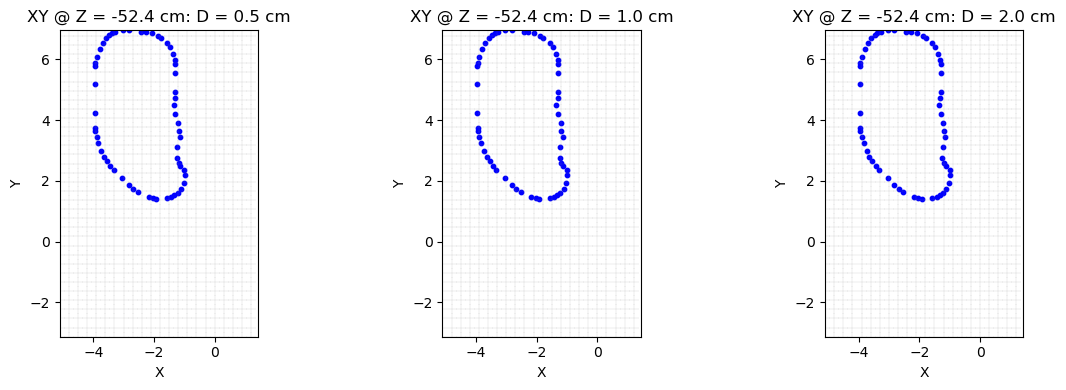

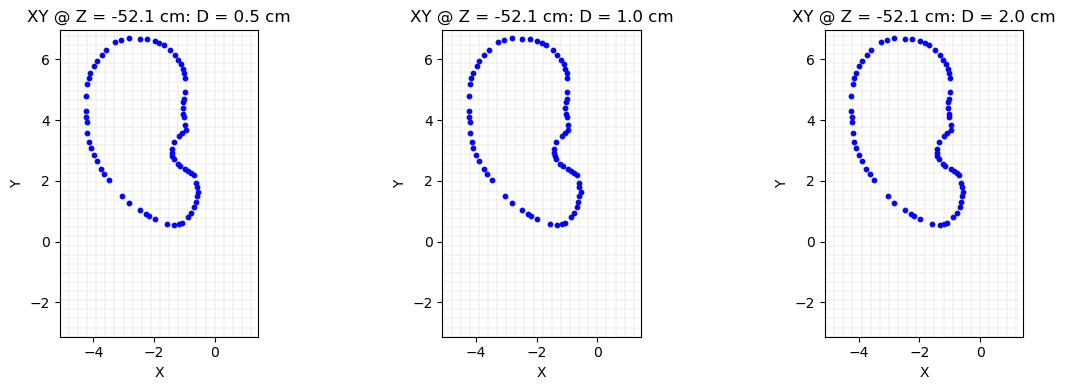

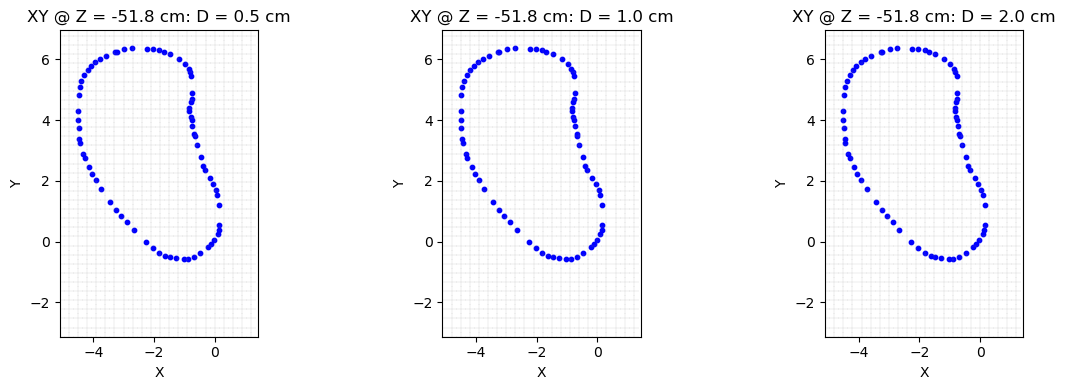

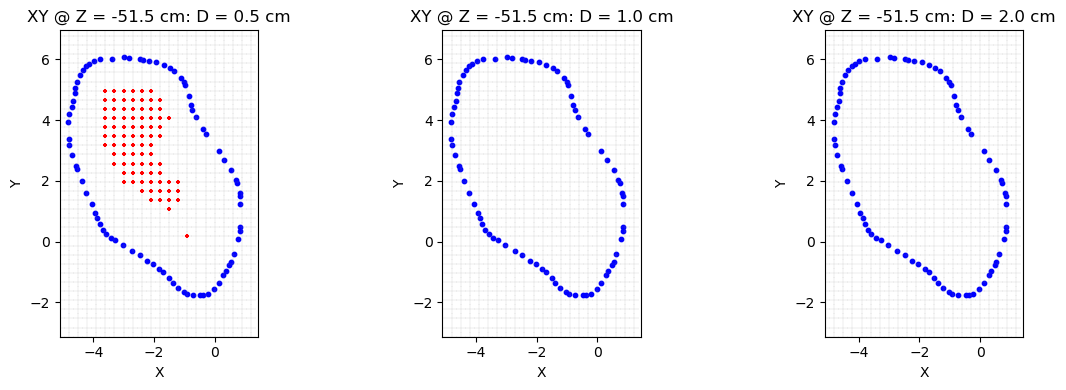

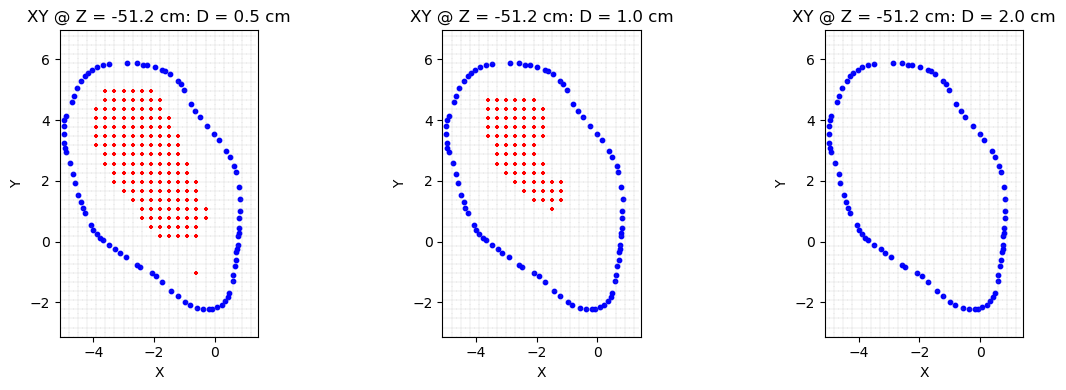

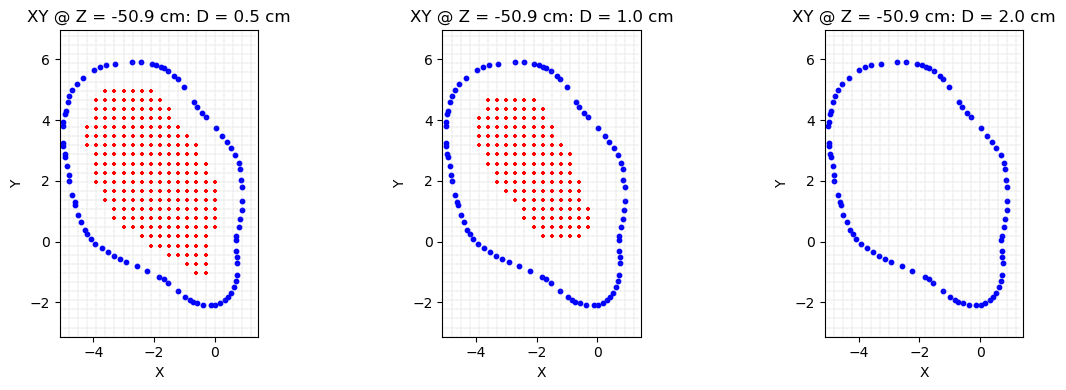

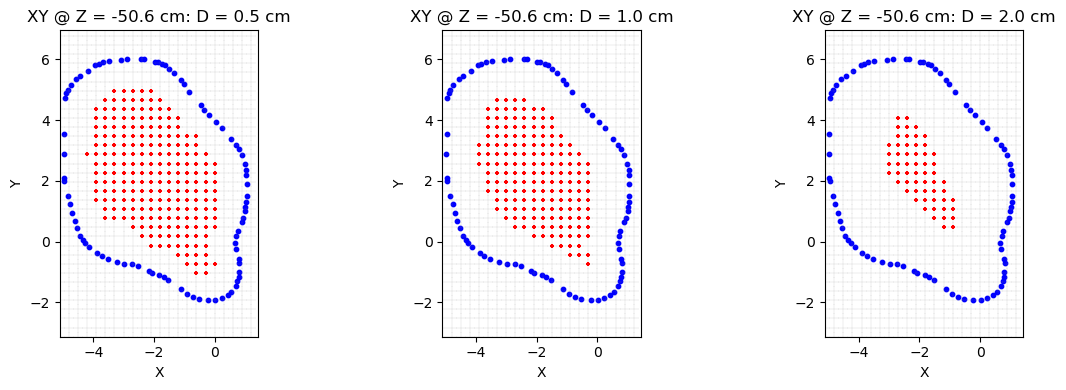

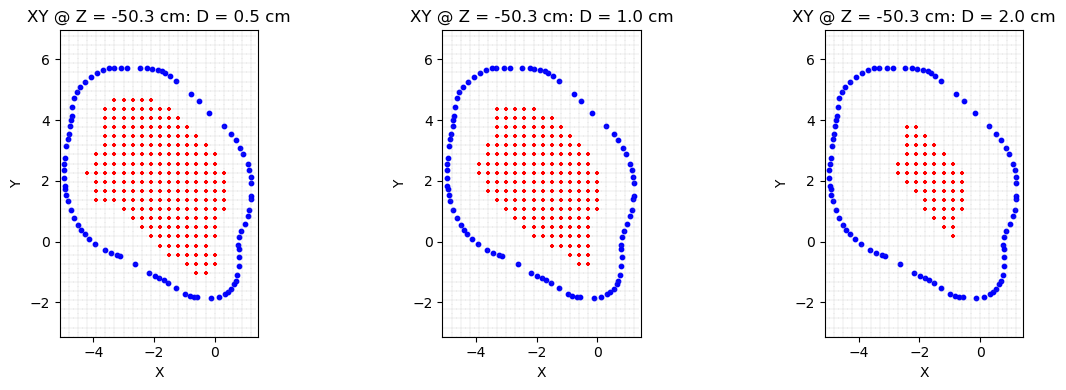

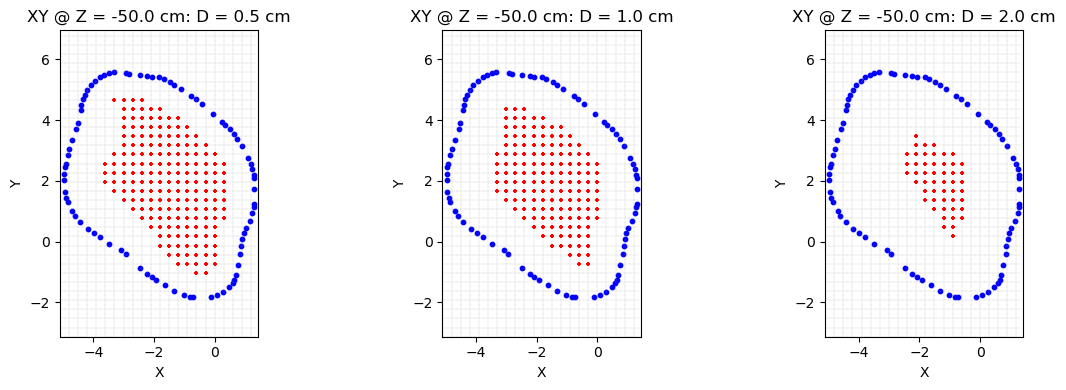

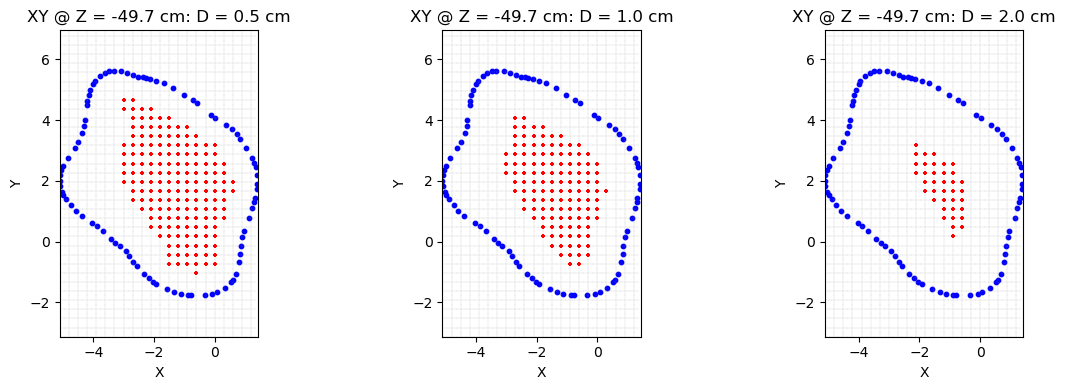

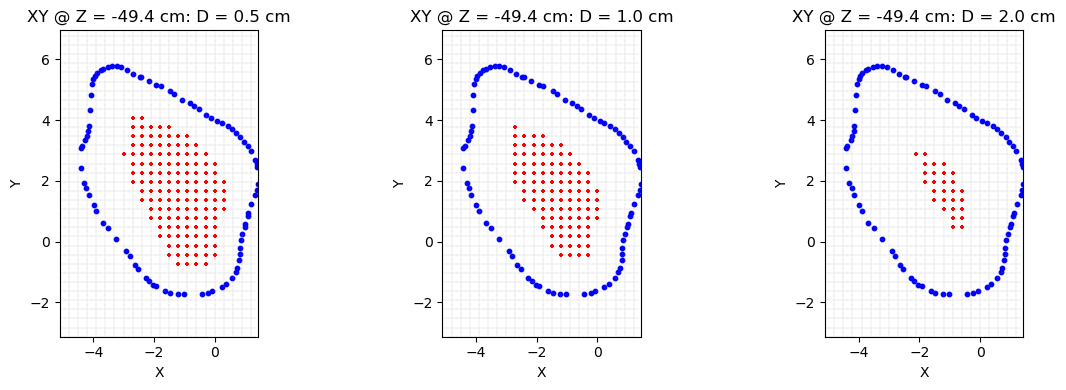

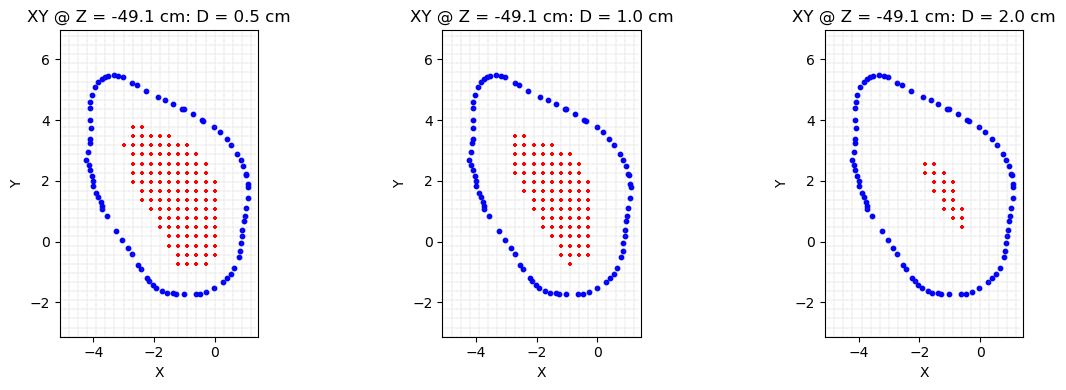

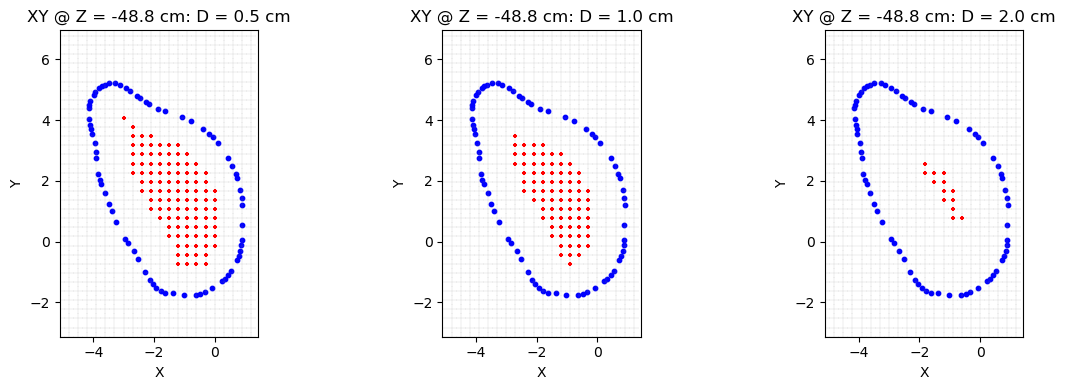

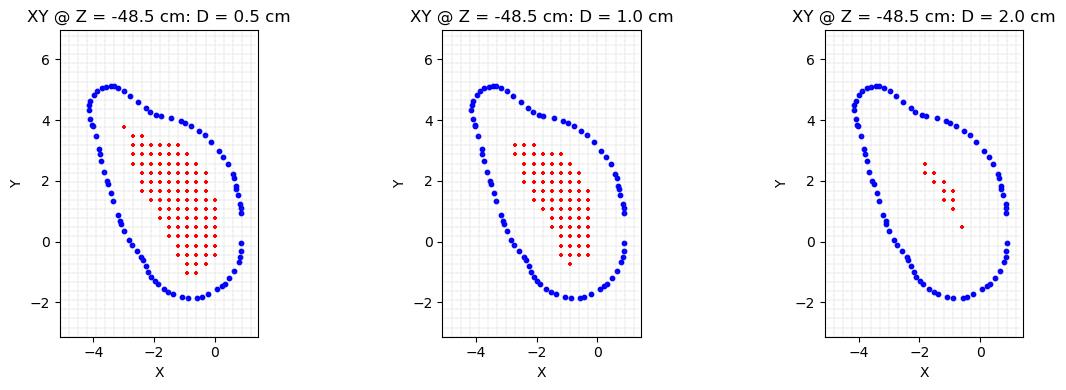

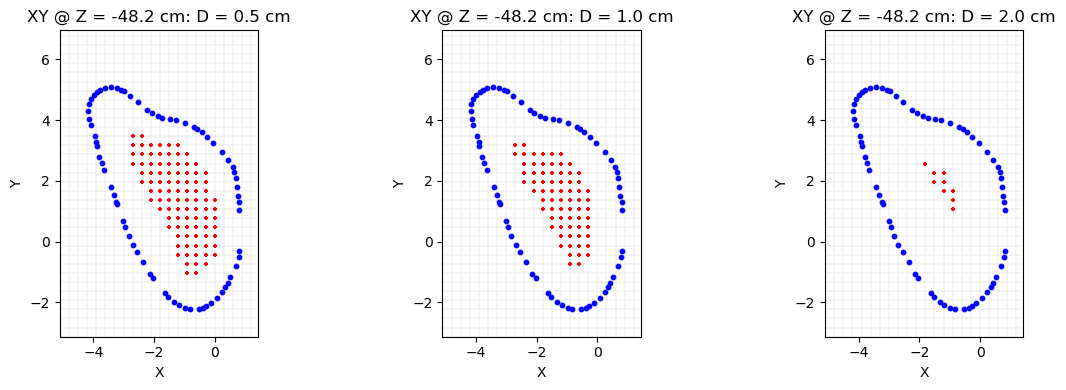

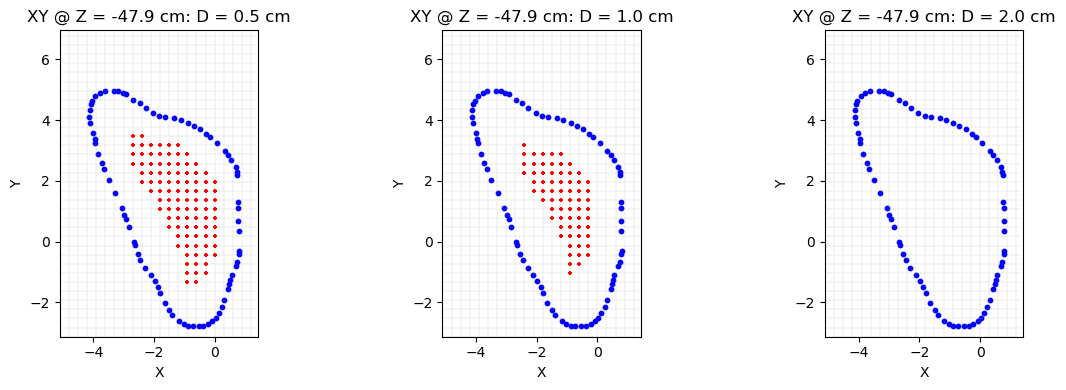

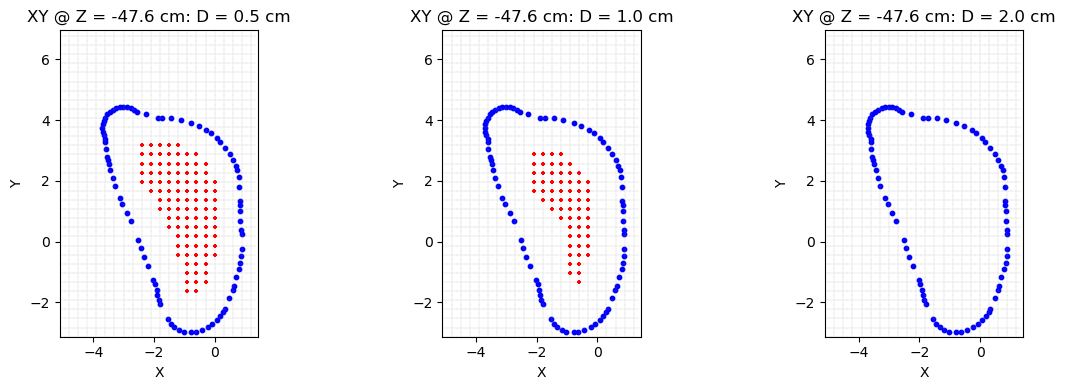

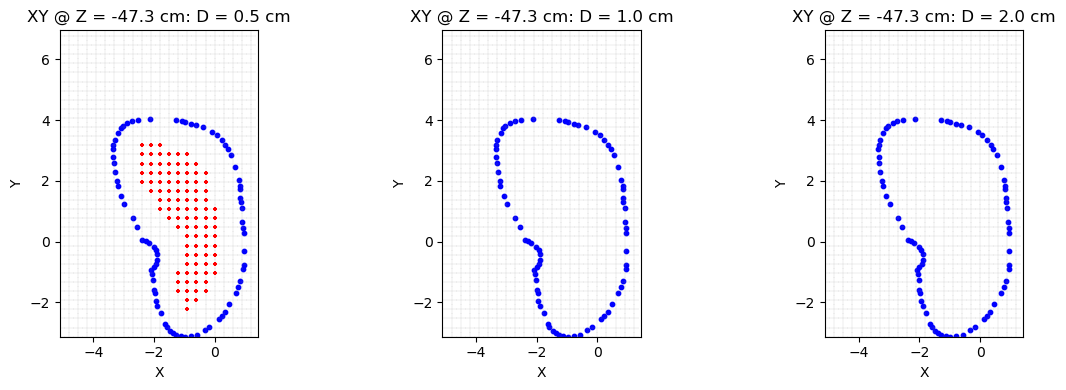

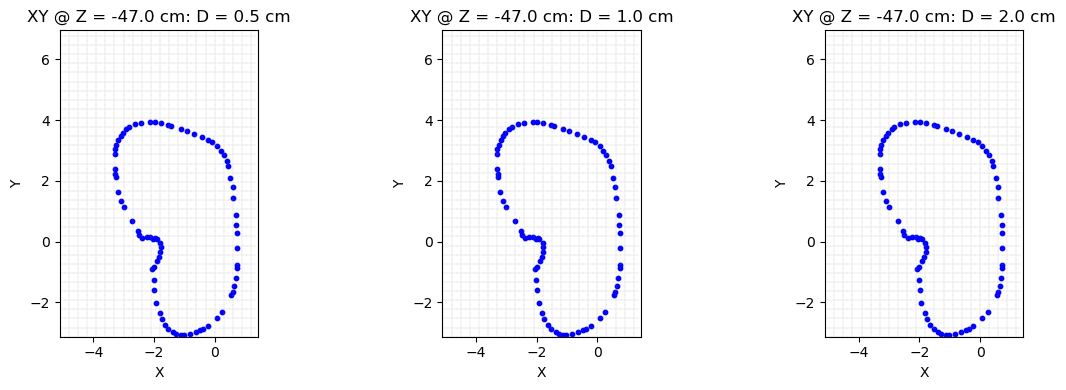

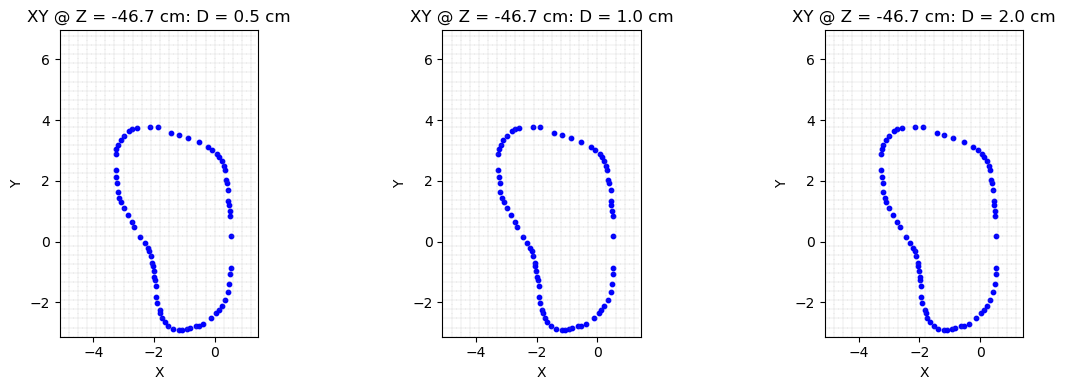

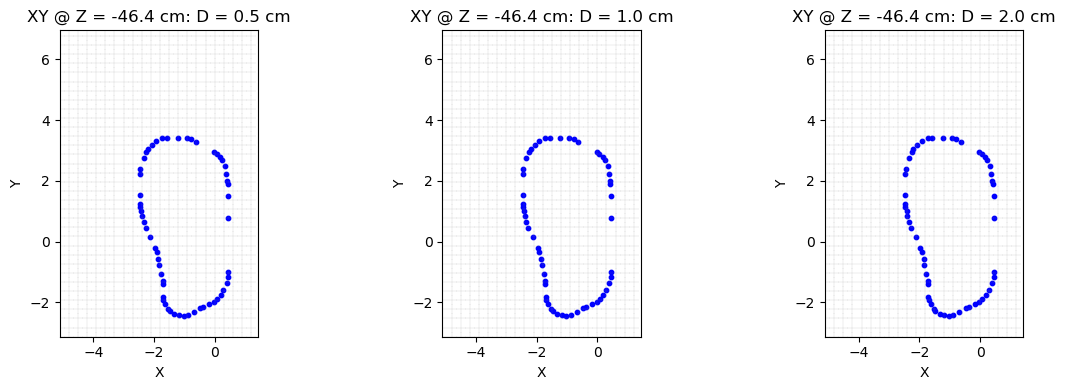

In [11]:
for z_ind in range(len(unique_z_values)):
    z = unique_z_values[z_ind]
    x_inside, y_inside, z_inside = candidates[z_ind][0], candidates[z_ind][1], candidates[z_ind][2]
    #
    x_tumor_z = []
    y_tumor_z = []
    for e in ALL[z_ind]:
        x_tumor_z.append(e[0])
        y_tumor_z.append(e[1])
    #
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
    ax1.scatter(x_tumor_z, y_tumor_z, c='blue', marker='o',s=10)
    ax1.scatter(x_grid, y_grid, c='gray', marker='+', lw=0.1, s=50)
    ax1.scatter(x_inside[0], y_inside[0], c='r', marker='+', s=20*spacing)
    ax1.set_xlim(x_min, x_max)
    ax1.set_ylim(y_min, y_max)
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_title(f'XY @ Z = {np.round(z,1)} cm: D = {2*radii[0]} cm')
    ax1.set_aspect('equal')
    #
    ax2.scatter(x_tumor_z, y_tumor_z, c='blue', marker='o',s=10)
    ax2.scatter(x_grid, y_grid, c='gray', marker='+', lw=0.1, s=50)
    ax2.scatter(x_inside[1], y_inside[1], c='r', marker='+', s=20*spacing)
    ax2.set_xlim(x_min, x_max)
    ax2.set_ylim(y_min, y_max)
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title(f'XY @ Z = {np.round(z,1)} cm: D = {2*radii[1]} cm')
    ax2.set_aspect('equal')
    #
    ax3.scatter(x_tumor_z, y_tumor_z, c='blue', marker='o',s=10)
    ax3.scatter(x_grid, y_grid, c='gray', marker='+', lw=0.1, s=50)
    ax3.scatter(x_inside[2], y_inside[2], c='r', marker='+', s=20*spacing)
    ax3.set_xlim(x_min, x_max)
    ax3.set_ylim(y_min, y_max)
    ax3.set_xlabel('X')
    ax3.set_ylabel('Y')
    ax3.set_title(f'XY @ Z = {np.round(z,1)} cm: D = {2*radii[2]} cm')
    ax3.set_aspect('equal')
    #
    plt.tight_layout()
    plt.show()

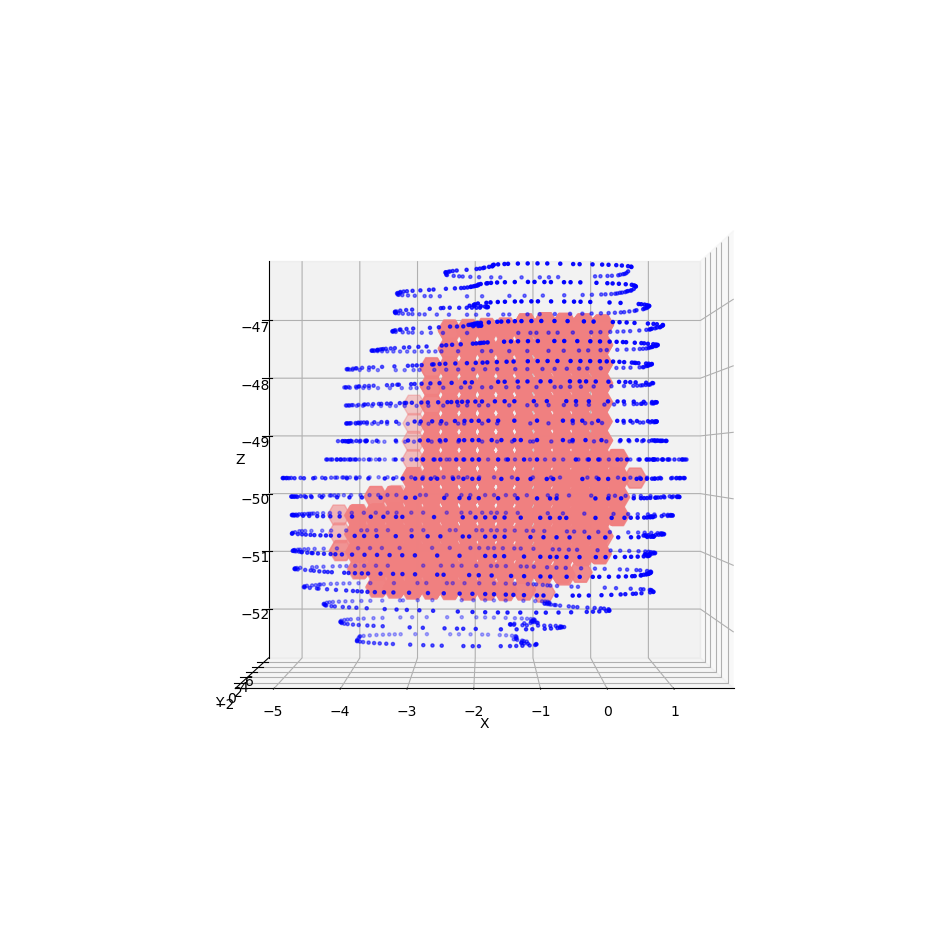

In [12]:
xMarg = []
yMarg = []
zMarg = []
#
for z in range(len(candidates)):
    for p in range(len(candidates[z][0][0])):
        xMarg.append(candidates[z][0][0][p])
        yMarg.append(candidates[z][1][0][p])
        zMarg.append(candidates[z][2][0][p])
#
xT = tumor['X']
yT = tumor['Y']
zT = tumor['Z']
fig = plt.figure(figsize=(12,12))
p = fig.add_subplot(111, projection='3d')
p.scatter(xT, yT, zT, color='b', marker='.')
p.scatter(xMarg, yMarg, zMarg, color='lightcoral', marker='H', s=900*spacing)
p.set_xlabel('X')
p.set_ylabel('Y')
p.set_zlabel('Z')
p.view_init(elev=0, azim=270, roll=0)
p.set_aspect('equal')
plt.show()

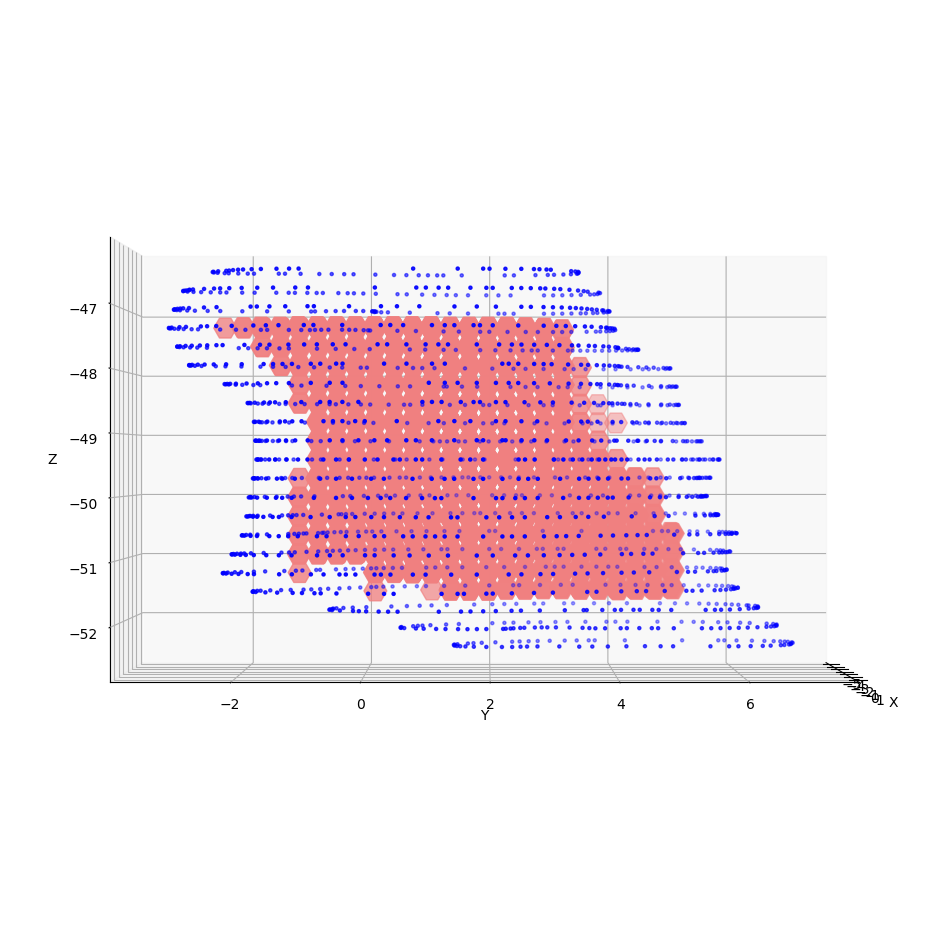

In [13]:
fig = plt.figure(figsize=(12,12))
p = fig.add_subplot(111, projection='3d')
p.scatter(xT, yT, zT, color='b', marker='.')
p.scatter(xMarg, yMarg, zMarg, color='lightcoral', marker='H', s=900*spacing)
p.set_xlabel('X')
p.set_ylabel('Y')
p.set_zlabel('Z')
p.view_init(elev=0, azim=0, roll=0)
p.set_aspect('equal')
plt.show()

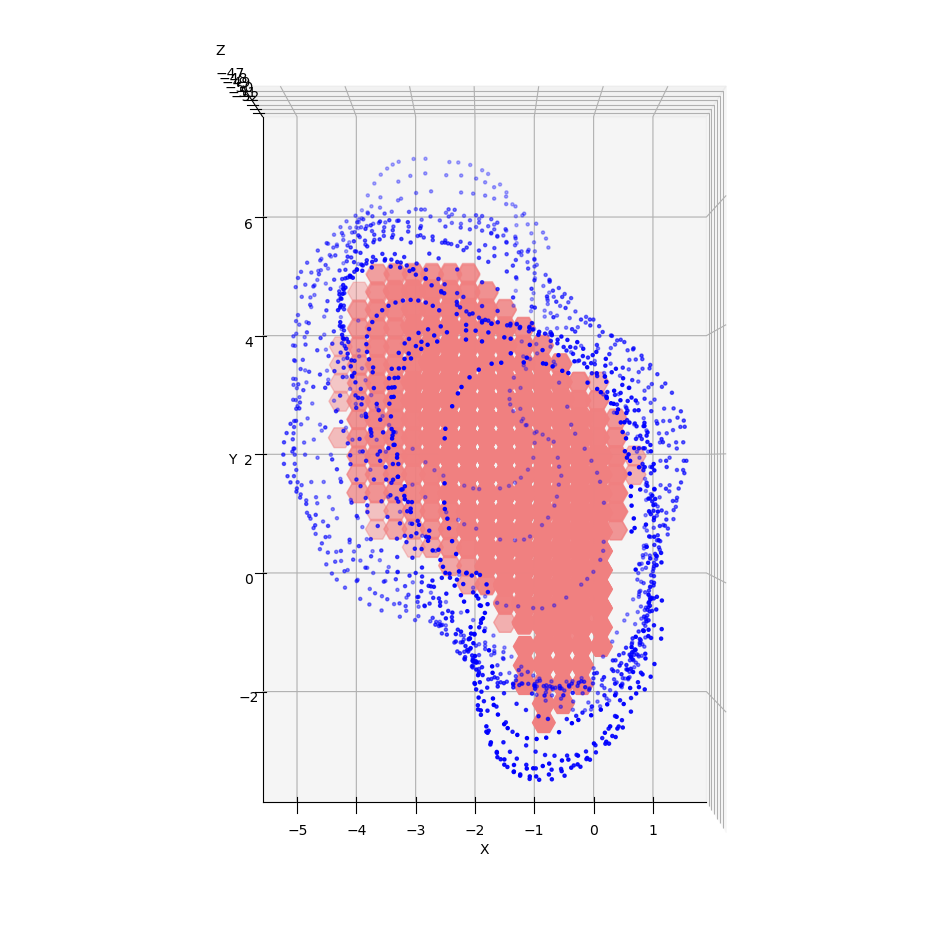

In [14]:
fig = plt.figure(figsize=(12,12))
p = fig.add_subplot(111, projection='3d')
p.scatter(xT, yT, zT, color='b', marker='.')
p.scatter(xMarg, yMarg, zMarg, color='lightcoral', marker='H', s=900*spacing)
p.set_xlabel('X')
p.set_ylabel('Y')
p.set_zlabel('Z')
p.view_init(elev=90, azim=90, roll=180)
p.set_aspect('equal')
plt.show()

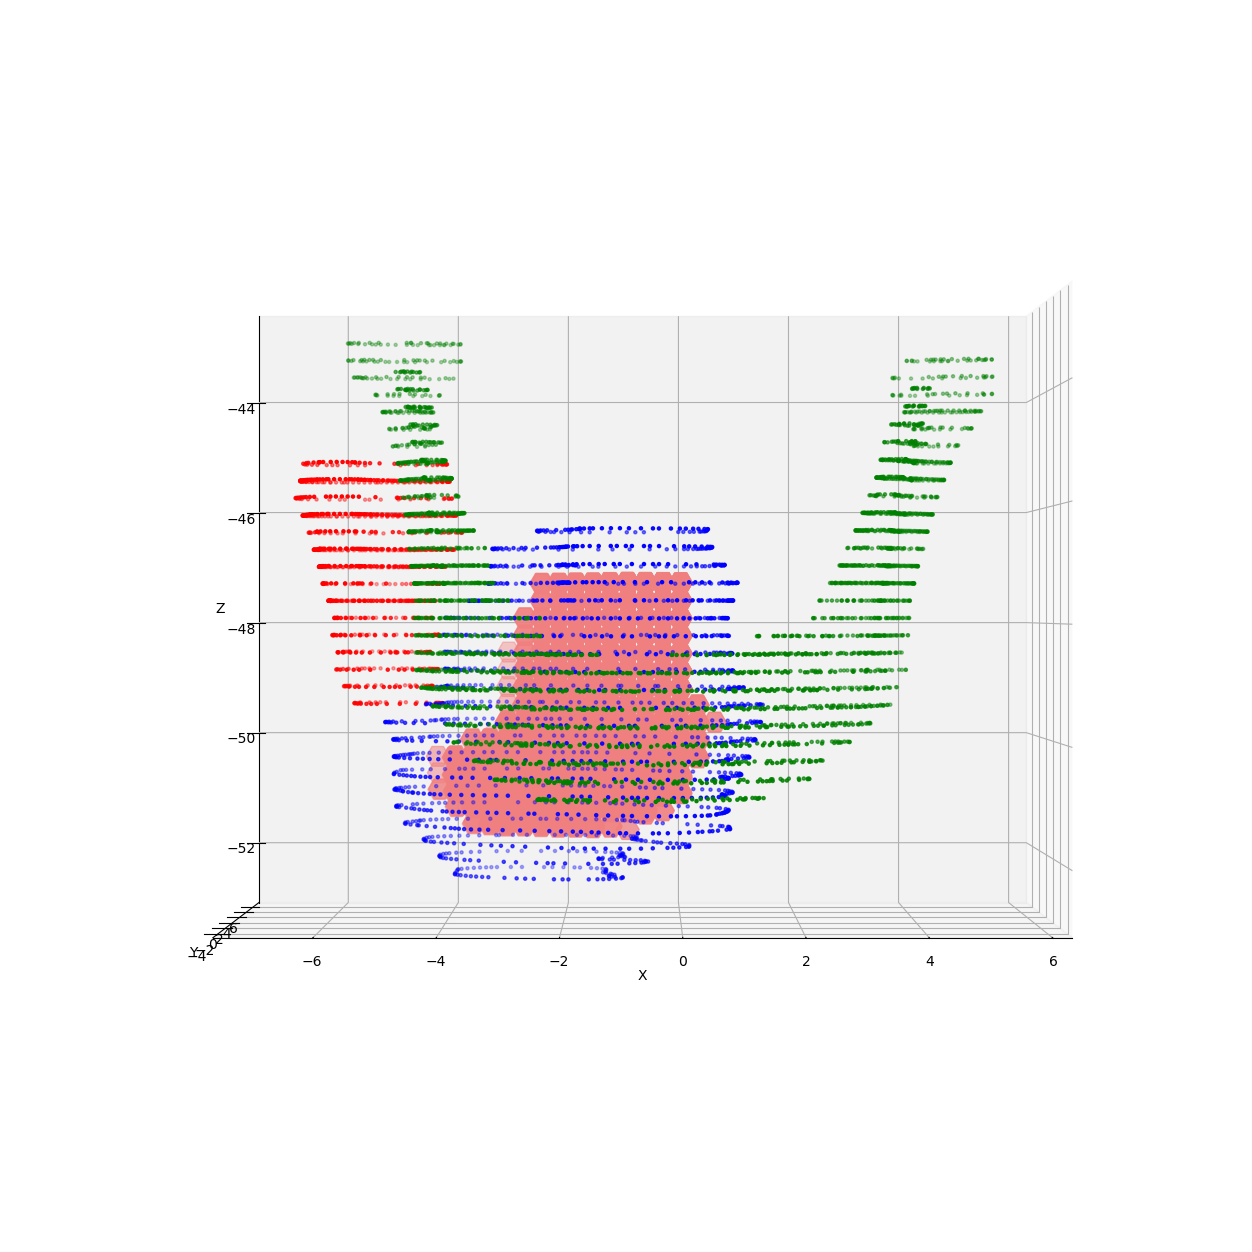

In [15]:
fig = plt.figure(figsize=(16,16))
p = fig.add_subplot(111, projection='3d')
p.scatter(xT, yT, zT, color='b', marker='.')
p.scatter(xMarg, yMarg, zMarg, color='lightcoral', marker='H', s=900*spacing)
#p.scatter(xB, yB, zB, color='magenta', marker='.')
#p.scatter(xLx, yLx, zLx, color='orange', marker='.')
#p.scatter(xLp, yLp, zLp, color='black', marker=',')
p.scatter(xM, yM, zM, color='g', marker='.')
#p.scatter(xPl, yPl, zPl, color='r', marker='.')
p.scatter(xPr, yPr, zPr, color='r', marker='.')
#p.scatter(xS, yS, zS, color='y', marker='.')
p.set_aspect('equal')
p.view_init(elev=0, azim=270, roll=0)
p.set_xlabel('X')
p.set_ylabel('Y')
p.set_zlabel('Z')
plt.show()

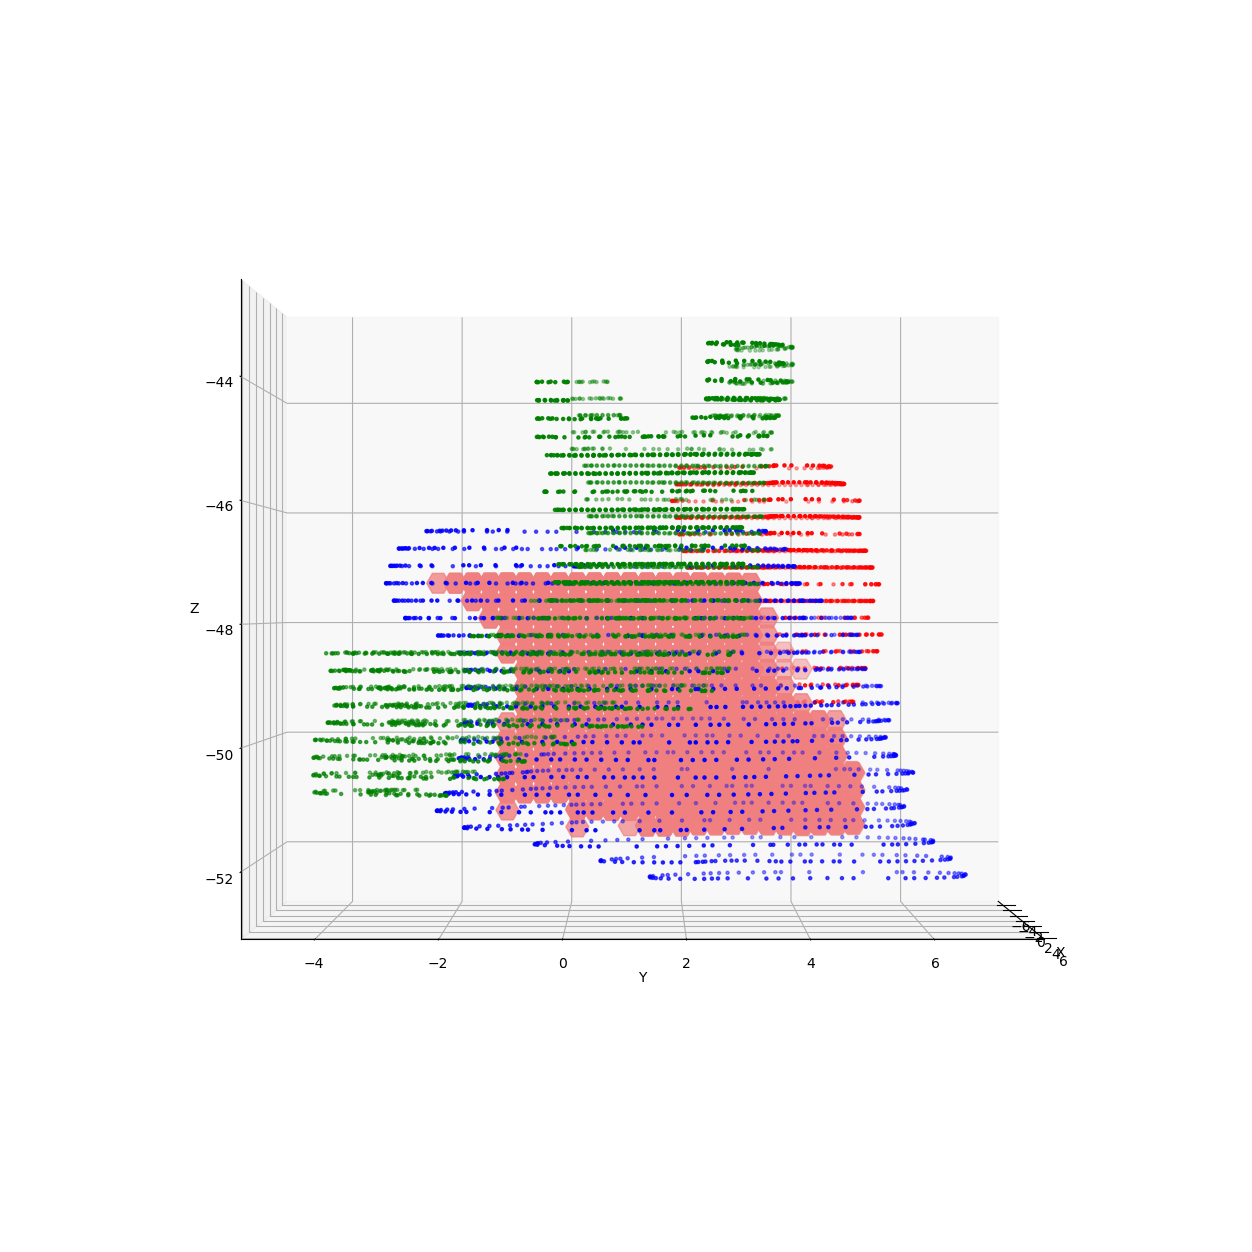

In [16]:
fig = plt.figure(figsize=(16,16))
p = fig.add_subplot(111, projection='3d')
p.scatter(xT, yT, zT, color='b', marker='.')
p.scatter(xMarg, yMarg, zMarg, color='lightcoral', marker='H', s=900*spacing)
#p.scatter(xB, yB, zB, color='magenta', marker='.')
#p.scatter(xLx, yLx, zLx, color='orange', marker='.')
#p.scatter(xLp, yLp, zLp, color='black', marker=',')
p.scatter(xM, yM, zM, color='g', marker='.')
#p.scatter(xPl, yPl, zPl, color='r', marker='.')
p.scatter(xPr, yPr, zPr, color='r', marker='.')
#p.scatter(xS, yS, zS, color='y', marker='.')
p.set_aspect('equal')
p.view_init(elev=0, azim=0, roll=0)
p.set_xlabel('X')
p.set_ylabel('Y')
p.set_zlabel('Z')
plt.show()

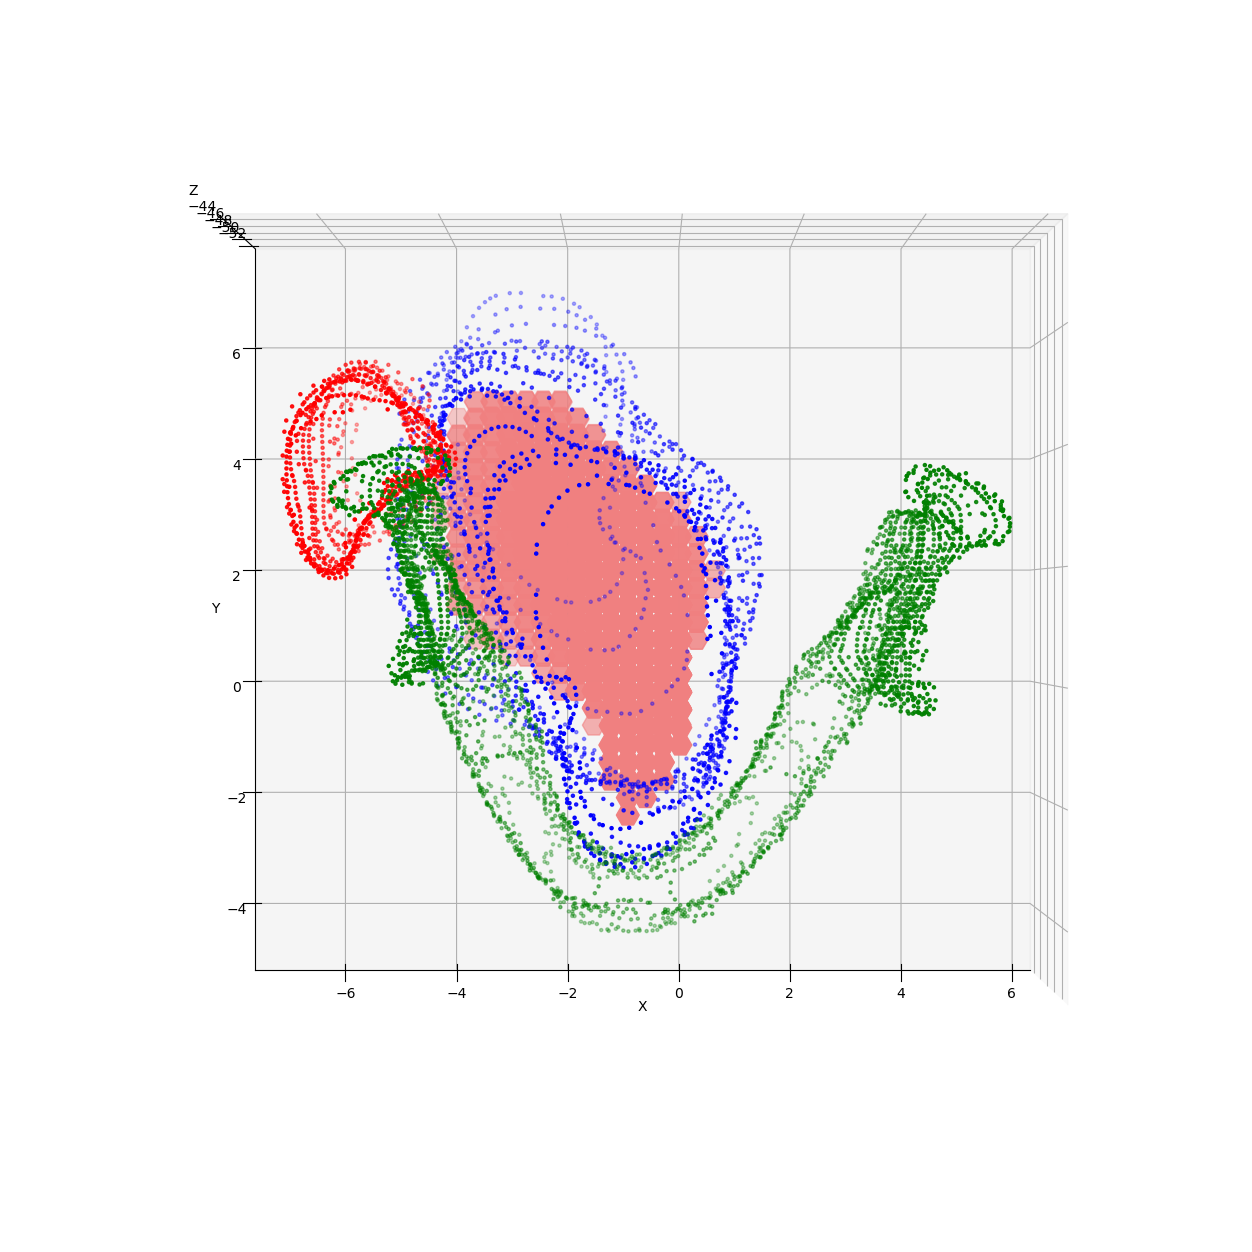

In [17]:
fig = plt.figure(figsize=(16,16))
p = fig.add_subplot(111, projection='3d')
p.scatter(xT, yT, zT, color='b', marker='.')
p.scatter(xMarg, yMarg, zMarg, color='lightcoral', marker='H', s=900*spacing)
#p.scatter(xB, yB, zB, color='magenta', marker='.')
#p.scatter(xLx, yLx, zLx, color='orange', marker='.')
#p.scatter(xLp, yLp, zLp, color='black', marker=',')
p.scatter(xM, yM, zM, color='g', marker='.')
#p.scatter(xPl, yPl, zPl, color='r', marker='.')
p.scatter(xPr, yPr, zPr, color='r', marker='.')
#p.scatter(xS, yS, zS, color='y', marker='.')
p.set_aspect('equal')
p.view_init(elev=90, azim=90, roll=180)
p.set_xlabel('X')
p.set_ylabel('Y')
p.set_zlabel('Z')
plt.show()

In [18]:
with open('_candidates.pkl', 'wb') as file:
    pickle.dump(candidates, file)
#
Marg = []
for i in range(len(xMarg)):
    p = [xMarg[i],yMarg[i],zMarg[i]]
    Marg.append(p)
with open('_feasReg.pkl', 'wb') as file:
    pickle.dump(Marg, file)

In [19]:
# Function to draw an ellipsoid
def draw_ellipsoid(center, a, b, c, ax, color='g', alpha=0.3):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = center[0] + a * np.outer(np.cos(u), np.sin(v))
    y = center[1] + b * np.outer(np.sin(u), np.sin(v))
    z = center[2] + c * np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, color=color, alpha=alpha)

# Function to plot the ellipsoids and the point e
def plot_ellipsoids_and_point(center, ellipsoids_2, point):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=0, azim=40, roll=0)
    # Draw each ellipsoid
    for ellipsoid in ellipsoids_2:
        draw_ellipsoid(center, ellipsoid[0], ellipsoid[1], ellipsoid[2], ax)
    # Plot the point e
    ax.scatter(*point, color='r', s=50)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

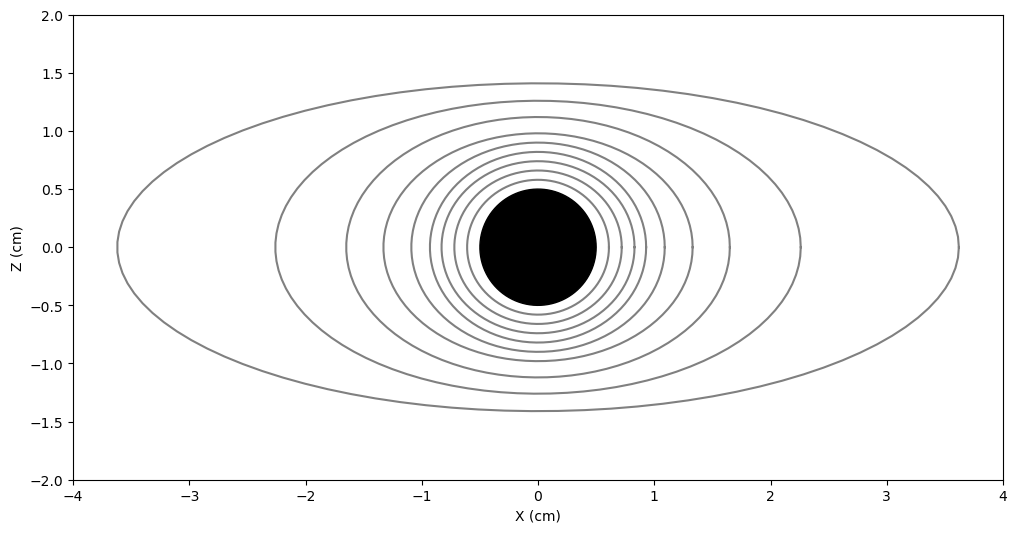

In [20]:
# Draw 2D ellipses
def draw_circle(center, radius, d):
    theta = np.linspace(0, 2*np.pi, 100)
    x = center[0] + radius * np.cos(theta)
    z = center[1] + radius * np.sin(theta)
    d.fill(x, z, label='Circle', color = 'black')

def draw_ellipse(center, axes, d):
    theta = np.linspace(0, 2*np.pi, 100)
    x = center[0] + axes[0] * np.cos(theta)
    z = center[1] + axes[1] * np.sin(theta)
    d.plot(x, z, label='Ellipse', color = 'gray')

circle_center = [0, 0]
circle_radius = 0.5

ellipse_data = [[0.61,0.58],[0.72,0.66],[0.83,0.74],[0.93,0.82],[1.09,0.9],[1.33,0.98],[1.65,1.12],[2.26,1.26],[3.62,1.41],[10,3.3]]

fig = plt.figure(figsize=(12,12))
d = fig.add_subplot(111)
draw_circle(circle_center, circle_radius, d)
for ellipse_axes in ellipse_data:
    draw_ellipse(circle_center, ellipse_axes, d)
d.set_aspect('equal')
d.set_xlabel('X (cm)')
d.set_ylabel('Z (cm)')
d.set_xlim(-4, 4)
d.set_ylim(-2,2)
plt.show()